# Import Libraries and Get Data onto Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)

In [2]:
# Read Data into Python
data = pd.read_csv("./loan.csv", low_memory = False)

# Start Understanding Data

In [3]:
# Classify data columns

# Type 1: Unique IDs issued by Lending Club -- ID, Member_ID, URL
# Type 2: Applicant Demographic -- emp_title, emp_length, home_ownership, zip_code, addr_state
# Type 3: Pre-loan Customer Behaviour / Attributes -- annual_inc, verification_status, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, application_type	annual_inc_joint, dti_joint, verification_status_joint
# Type 4: Loan Information at time of issue -- loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, issue_d, loan_status, pymnt_plan, desc, purpose, title, initial_list_status, mths_since_last_major_derog, pub_rec_bankruptcies, tax_liens
# Type 5: Loan Information post-issue / at time of collating data -- out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d

In [4]:
# Review Sample Data
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# Get Info on Data
data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

In [6]:
# Describe Data
data.describe(include = 'all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,1140,39715,39661.0,0.0,39717.0,39717,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26527,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.14

# Start Reviewing Data for Quality Issues

## Remove columns unsuitable for analysis

### Type 1
- Meaning of 'id' - A unique LC assigned ID for the loan listing

- Meaning of 'member_id' - A unique LC assigned Id for the borrower member

- Meaning of 'url' - URL for the LC page with listing data

- Meaning of 'last_credit_pull_d' - The most recent month LC pulled credit for this loan; this date is not useful

These columns are not predictive of applicant's likelihood of defaulting loan repayment

### Type 2

- Meaning of 'emp_title' - The job title supplied by the Borrower when applying for the loan; Employer Title replaces Employer Name for all loans listed after 9/23/2013

Column contains mixed data - employer name prior to 9/23/2013 and job titles post the date. Furthermore, Job Titles are not standardised across loan applicants / industries, and therefore column 'emp_title' is unsuitable for analysis

### Type 3

- Meaning of 'desc' - Loan description provided by the borrower

- Meaning of 'title' - The loan title provided by the borrower

These columns contain subjective data, not suitable for analysis. Also in the available format, both have verbose data which are not fit for analysis. Column 'desc' is also missing a lot of data (based on 'describe' step above, it is clear that only 26,777 out of 39,717 rows are filled; i.e. missing data in 10% rows)

### Type 4

All columns with > 20% missing values

### Type 5

Columns with only one value -- these cannot help with analysis. Examples:
- policy_code, which is always 1
- collections_12_mths_ex_med, which is always 0 or missing values
- chargeoff_within_12_mths, which is always 0 or missing values
- tax_liens, which is always 0 or missing values
- acc_now_delinq, which is always 0 or missing values
- delinq_amnt, which is always 0 or missing values 
- pymnt_plan, which is always 'n'
- initial_list_status, which is always 'f'
- application_type, which is always 'INDIVIDUAL'

### Type 6

Variables describing loan attribute after disbursal. Other than loan_status, no such variable is useful for predicting default. Examples include:

- out_prncp - meaning: Remaining outstanding principal for total amount funded                  
- out_prncp_inv - meaning: Remaining outstanding principal for portion of total amount funded by investors           
- total_pymnt - meaning: Payments received to date for total amount funded
- total_pymnt_inv - meaning: Payments received to date for portion of total amount funded by investors
- total_rec_prncp - meaning: Principle received to date
- total_rec_int - meaning: Interest received to date
- total_rec_late_fee - meaning: Late fees received to date       
- recoveries - meaning: post charge off gross recovery                 
- collection_recovery_fee - meaning: post charge off collection fee
- last_pymnt_amnt - meaning: Last total payment amount received
- last_pymnt_d - meaning: Last month payment was received

In [7]:
cols_to_drop = ['id', 'member_id', 'url', 'last_credit_pull_d', 'emp_title', 'desc', 'title', 'policy_code', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', 'acc_now_delinq', 'delinq_amnt', 'pymnt_plan', 'initial_list_status', 'application_type', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_pymnt_d']
data.drop(cols_to_drop, inplace = True, axis = 1)

In [8]:
miss_val_cols = list(data.count()[data.count() < 0.8 * len(data)].index.values) # pick up column names where count < 80% of total number or rows

data.drop(miss_val_cols, inplace = True, axis = 1) # remove columns having fewer than 80% non-nulls (i.e. > 20% nulls)

In [9]:
# Describe Data
data.describe(include = 'all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,39717,39717.000000,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39020.000000
unique,NaN,NaN,NaN,2,371,NaN,7,35,11,5,NaN,3,55,3,14,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,1089,NaN,NaN
top,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,debt_consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,0%,NaN,NaN
freq,NaN,NaN,NaN,29096,956,NaN,12020,2917,8879,18899,NaN,16921,2260,32950,18641,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,977,NaN,NaN
mean,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.146512,NaN,0.869200,9.294408,0.055065,13382.528086,NaN,22.088828,0.043260
std,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,NaN,NaN,6.379377e+04,NaN,NaN,NaN,NaN,NaN,NaN,6.678594,0.491812,NaN,1.070219,4.400282,0.237200,15885.016641,NaN,11.401709,0.204324
min,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,2.000000,0.000000,0.000000,NaN,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,NaN,NaN,167.020000,NaN,NaN,NaN,NaN,4.040400e+04,NaN,NaN,NaN,NaN,NaN,NaN,8.170000,0.000000,NaN,0.000000,6.000000,0.000000,3703.000000,NaN,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,NaN,NaN,280.220000,NaN,NaN,NaN,NaN,5.900000e+04,NaN,NaN,NaN,NaN,NaN,NaN,13.400000,0.000000,NaN,1.000000,9.000000,0.000000,8850.000000,NaN,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,NaN,NaN,430.780000,NaN,NaN,NaN,NaN,8.230000e+04,NaN,NaN,NaN,NaN,NaN,NaN,18.600000,0.000000,NaN,1.000000,12.000000,0.000000,17058.000000,NaN,29.000000,0.000000


# Clean Data
- Remove white spaces

In [10]:
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

- Treat percentages columns: currently they are 'object' types; they need to be treated as numeric variables

In [11]:
data["int_rate"] = data["int_rate"].apply(lambda x: x.strip('%')).astype('float')
data["revol_util"] = data["revol_util"].apply(lambda x: str(x).strip('%')).astype('float')

- Treat missing values

In [12]:
# first identify the columns having missing values
data.count()

# emp_length; first analyse it and then treat missing values accordingly
data["emp_length"].value_counts() # since data is categorical and hard to predict, just flag missing values as having No Data
data["emp_length"][data["emp_length"].isnull()] = 'No Data'

# revol_util; analyse it along with related variable, i.e. revol_bal and then treat missing values
data["revol_bal"][data["revol_util"].isnull()].value_counts() # only 1 row has revol_bal > 0 and revol_util -- exclude this line, impute others with 0
data["revol_util"][data["revol_bal"] == 0].value_counts() # 79 rows have revol_bal = 0 but revol_util > 0; this is a data issue and can't be imputed reasonably without knowledge of applicant's total limit on available revolving accounts; 79 is also a small number of rows; hence drop them
data.drop(data[(data["revol_bal"] > 0) & (data["revol_util"].isnull())].index, inplace = True)
data["revol_util"][data["revol_util"].isnull()] = 0
data.drop(data[(data["revol_bal"] == 0) & (data["revol_util"] > 0)].index, inplace = True)

# pub_rec_bankruptcies; ~2% of the data missing; not patterns to find as such; since no smart way to impute data here, remove these
data.groupby(["pub_rec_bankruptcies", "loan_status"])["loan_status"].count()
data.drop(data[data["pub_rec_bankruptcies"].isnull()].index, inplace = True)

# check for missing values again
data.count()

C:\Users\shasnagarajan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shasnagarajan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


loan_amnt               38940
funded_amnt             38940
funded_amnt_inv         38940
term                    38940
int_rate                38940
installment             38940
grade                   38940
sub_grade               38940
emp_length              38940
home_ownership          38940
annual_inc              38940
verification_status     38940
issue_d                 38940
loan_status             38940
purpose                 38940
zip_code                38940
addr_state              38940
dti                     38940
delinq_2yrs             38940
earliest_cr_line        38940
inq_last_6mths          38940
open_acc                38940
pub_rec                 38940
revol_bal               38940
revol_util              38940
total_acc               38940
pub_rec_bankruptcies    38940
dtype: int64

- Treat dates columns: currently they are 'object' types; they need to be treated as numeric variables

In [13]:
data["issue_d"] = data["issue_d"].apply(lambda x: datetime.strptime(x, '%b-%y'))
data["earliest_cr_line"] = data["earliest_cr_line"].apply(lambda x: datetime.strptime(x, '%b-%y'))

- Order Employment Length for sorting / further analysis

In [14]:
def emp_length_clean_for_sort(x):
    if x == 'No Data':
        return 'A. No Data'
    elif x == '< 1 year':
        return 'B. < 1 yr'
    elif x == '1 years':
        return 'C. 1-2 yrs'    
    elif x == '2 years':
        return 'D. 2-3 yrs'
    elif x == '3 years':
        return 'E. 3-4 yrs'
    elif x == '4 years':
        return 'F. 4-5 yrs'
    elif x == '5 years':
        return 'G. 5-6 yrs'
    elif x == '6 years':
        return 'H. 6-7 yrs'
    elif x == '7 years':
        return 'I. 7-8 yrs'
    elif x == '8 years':
        return 'J. 8-9 yrs'
    elif x == '9 years':
        return 'K. 9-10 yrs'
    else:
        return 'L. 10+ yrs'

data["emp_length"] = data["emp_length"].apply(lambda x:emp_length_clean_for_sort(x))

# Conduct Univariate/Bivariate Analyses

- Objective 1: Understand variable distributions
- Objective 2: Detect and treat outliers
- Objective 3: Understand relationship between variable and target variable and/or other variables
- Objective 4: Create derivative variables if they may be useful for analysis

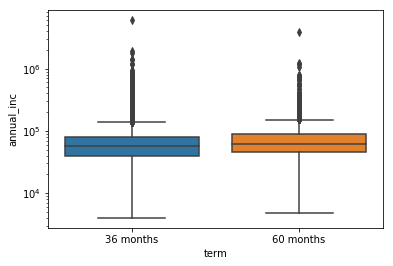

Term: 36 mo - 5th percentile - 23000.0
Term: 36 mo - 95th percentile - 140000.0
Term: 60 mo - 5th percentile - 27600.0
Term: 60 mo - 95th percentile - 150000.0


In [15]:
# Analyse Income distribution

# Observe Income box plots by Term; larger amounts of money can be lent with term 60 vs. 36 months; hence using term to differentiate
sns.boxplot(x='term', y='annual_inc', data=data)
plt.yscale('log')
plt.show()

# Get 5th and 95th percentiles for each Term
print('Term: 36 mo - 5th percentile - ' + str(np.round(np.percentile(data["annual_inc"][data["term"] == '36 months'], 5), 2)))
print('Term: 36 mo - 95th percentile - ' + str(np.round(np.percentile(data["annual_inc"][data["term"] == '36 months'], 95), 2)))

print('Term: 60 mo - 5th percentile - ' + str(np.round(np.percentile(data["annual_inc"][data["term"] == '60 months'], 5), 2)))
print('Term: 60 mo - 95th percentile - ' + str(np.round(np.percentile(data["annual_inc"][data["term"] == '60 months'], 95), 2)))

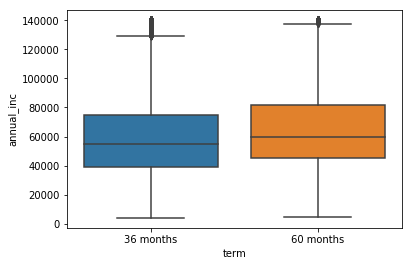

C:\Users\shasnagarajan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shasnagarajan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
# Clearly lots of outliers in terms of annual_inc; treat them

# Firstly, remove data where income > 95th percentile; take the 36 mo 95th percentile here, since only $10k difference vs. 60 mo 95th percentile

data.drop(data[data["annual_inc"] > 140000].index, inplace = True)

# Review the box plots again

sns.boxplot(x='term', y='annual_inc', data=data)
#plt.yscale('log')
plt.show()

# Chart looks better so do not look further for income outliers; if needed, come back to this

# Might be useful to see income deciles in the data; so add these
data["inc_decile"] = 0 #initialise
data["inc_decile"][data["term"]=="36 months"] = pd.qcut(x=data["annual_inc"][data["term"]=="36 months"], q=10, labels=np.arange(10))
data["inc_decile"][data["term"]=="60 months"] = pd.qcut(x=data["annual_inc"][data["term"]=="60 months"], q=10, labels=np.arange(10))

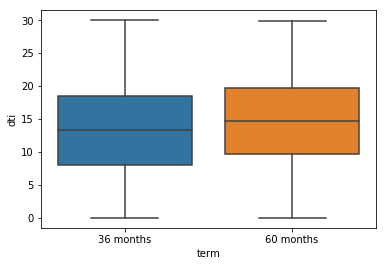

In [17]:
# Analyse dti distribution

# Observe Box Plot
sns.boxplot(x='term', y='dti', data=data)
#plt.yscale('log')
plt.show()

# INSIGHT: DTI cutoff for loan application appears to be 30; also as expected, dti on average is slightly higher for the 60 month term loans

# Might be useful to see dti buckets in the data; so add these

def dti_bucket(x):
    if x < 5:
        return '1. <5'
    elif x < 10:
        return '2. 5-10'
    elif x < 15:
        return '3. 10-15'
    elif x < 20:
        return '4. 15-20'
    elif x < 25:
        return '5. 20-25'
    else:
        return '6. 25-30'

data["dti_bucket"] = data["dti"].apply(lambda x:dti_bucket(x))

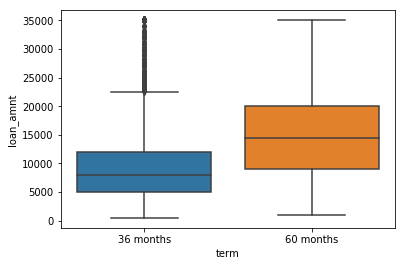

Term: 36 mo - 5th percentile - 2000.0
Term: 36 mo - 95th percentile - 21000.0
Term: 60 mo - 5th percentile - 4000.0
Term: 60 mo - 95th percentile - 30000.0


In [18]:
# Observe Loan Amount box plots by Term, since the two terms (36 and 60 months) are hugely different and can impact the Loan Amount
sns.boxplot(x='term', y='loan_amnt', data=data)
#plt.yscale('log')
plt.show()

# Get 5th and 95th percentiles for each Term
print('Term: 36 mo - 5th percentile - ' + str(np.round(np.percentile(data["loan_amnt"][data["term"] == '36 months'], 5), 2)))
print('Term: 36 mo - 95th percentile - ' + str(np.round(np.percentile(data["loan_amnt"][data["term"] == '36 months'], 95), 2)))

print('Term: 60 mo - 5th percentile - ' + str(np.round(np.percentile(data["loan_amnt"][data["term"] == '60 months'], 5), 2)))
print('Term: 60 mo - 95th percentile - ' + str(np.round(np.percentile(data["loan_amnt"][data["term"] == '60 months'], 95), 2)))

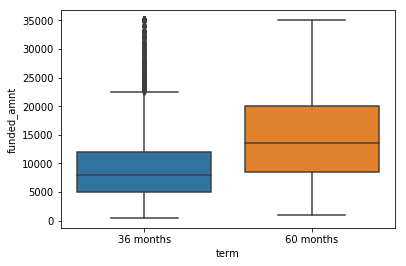

Term: 36 mo - 5th percentile - 2000.0
Term: 36 mo - 95th percentile - 20400.0
Term: 60 mo - 5th percentile - 4000.0
Term: 60 mo - 95th percentile - 30000.0


In [19]:
# Repeat for funded_amnt

# Observe funded_amnt box plots by Term, since the two terms (36 and 60 months) are hugely different and can impact the funded_amnt
sns.boxplot(x='term', y='funded_amnt', data=data)
#plt.yscale('log')
plt.show()

# Get 5th and 95th percentiles for each Term
print('Term: 36 mo - 5th percentile - ' + str(np.round(np.percentile(data["funded_amnt"][data["term"] == '36 months'], 5), 2)))
print('Term: 36 mo - 95th percentile - ' + str(np.round(np.percentile(data["funded_amnt"][data["term"] == '36 months'], 95), 2)))

print('Term: 60 mo - 5th percentile - ' + str(np.round(np.percentile(data["funded_amnt"][data["term"] == '60 months'], 5), 2)))
print('Term: 60 mo - 95th percentile - ' + str(np.round(np.percentile(data["funded_amnt"][data["term"] == '60 months'], 95), 2)))

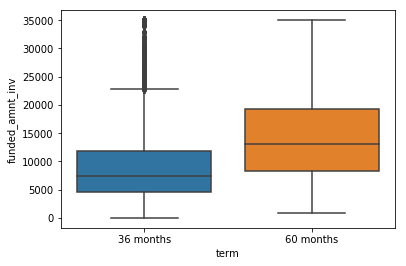

Term: 36 mo - 5th percentile - 1750.0
Term: 36 mo - 95th percentile - 20000.0
Term: 60 mo - 5th percentile - 3950.0
Term: 60 mo - 95th percentile - 29506.89


In [20]:
# Repeat for funded_amnt_inv

# Observe funded_amnt_inv box plots by Term, since the two terms (36 and 60 months) are hugely different and can impact the funded_amnt_inv
sns.boxplot(x='term', y='funded_amnt_inv', data=data)
#plt.yscale('log')
plt.show()

# Get 5th and 95th percentiles for each Term
print('Term: 36 mo - 5th percentile - ' + str(np.round(np.percentile(data["funded_amnt_inv"][data["term"] == '36 months'], 5), 2)))
print('Term: 36 mo - 95th percentile - ' + str(np.round(np.percentile(data["funded_amnt_inv"][data["term"] == '36 months'], 95), 2)))

print('Term: 60 mo - 5th percentile - ' + str(np.round(np.percentile(data["funded_amnt_inv"][data["term"] == '60 months'], 5), 2)))
print('Term: 60 mo - 95th percentile - ' + str(np.round(np.percentile(data["funded_amnt_inv"][data["term"] == '60 months'], 95), 2)))

Cut-off is: 22500.0
# Outliers: 1174
inc_decile  dti_bucket
1           1. <5           1
            2. 5-10         1
            4. 15-20        1
2           1. <5           1
            3. 10-15        3
            4. 15-20        3
3           1. <5           2
            2. 5-10         3
            3. 10-15        9
            4. 15-20        7
            5. 20-25        2
4           1. <5           5
            2. 5-10        12
            3. 10-15       17
            4. 15-20       25
            5. 20-25        7
5           1. <5           5
            2. 5-10        12
            3. 10-15       11
            4. 15-20       23
            5. 20-25       17
            6. 25-30        1
6           1. <5           8
            2. 5-10        14
            3. 10-15       33
            4. 15-20       45
            5. 20-25       23
            6. 25-30        5
7           1. <5          21
            2. 5-10        40
            3. 10-15       58
          

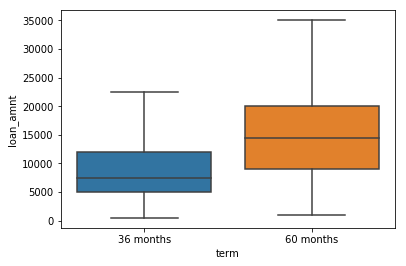

C:\Users\shasnagarajan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shasnagarajan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
# Observe that loan_amnt, funded_amnt, funded_amnt_inv are distributed similarly; so only analyse one of these- loan_amnt

# There seem to be outliers in the 36 mo loans group; identify them
q75, q25 = np.percentile(data["loan_amnt"][data["term"] == "36 months"], [75 ,25])
print('Cut-off is: ' + str(q75 + 1.5*(q75 - q25)))
print('# Outliers: ' + str(len(data[(data["loan_amnt"] > 22500) & (data["term"] == "36 months")])))

# Outliers have loan_amnt > 22500.0 and term = '36 months'; check if they are from high income / low dti groups
print(data[(data["loan_amnt"] > 22500) & (data["term"] == "36 months")].groupby(["inc_decile", "dti_bucket"]).loan_amnt.count())

# Outliers are coming from all income declines / dti buckets, hence no pattern emerging; remove all
data.drop(data[(data["loan_amnt"] > 22500) & (data["term"] == "36 months")].index, inplace = True)

# Observe box plot again
sns.boxplot(x='term', y='loan_amnt', data=data)
#plt.yscale('log')
plt.show()

# Make loan_amnt deciles as done with income above
data["loan_amnt_decile"] = 0 #initialise
data["loan_amnt_decile"][data["term"]=="36 months"] = pd.qcut(x=data["loan_amnt"][data["term"]=="36 months"], q=10, labels=np.arange(10))
data["loan_amnt_decile"][data["term"]=="60 months"] = pd.qcut(x=data["loan_amnt"][data["term"]=="60 months"], q=10, labels=np.arange(10))

# Define Target Variable for Analysis
- This is, in general, the variable we are interested in optimising

- In this case, we want to minimise the risk of charge-off (default)

- Hence flagging all loans with status 'Charged Off' as 1, and others as 0

- Default Rate or Charge Off Rate would be all loans charged off as a % of total number of loans disbursed

In [22]:
data["charge_off_flag"] = data["loan_status"].apply(lambda x:1 if x == 'Charged Off' else 0)

# Impact of Loan Term on Charge-Off Rates

### Insights:
1. 60 month loans riskier than 36 month loans

### Recommendation:
1. Be more stringent with 60 month loan approvals, as 1 ppt decrease in proportion of 60 mo loans would reduce total charge-off rate by 14 bps

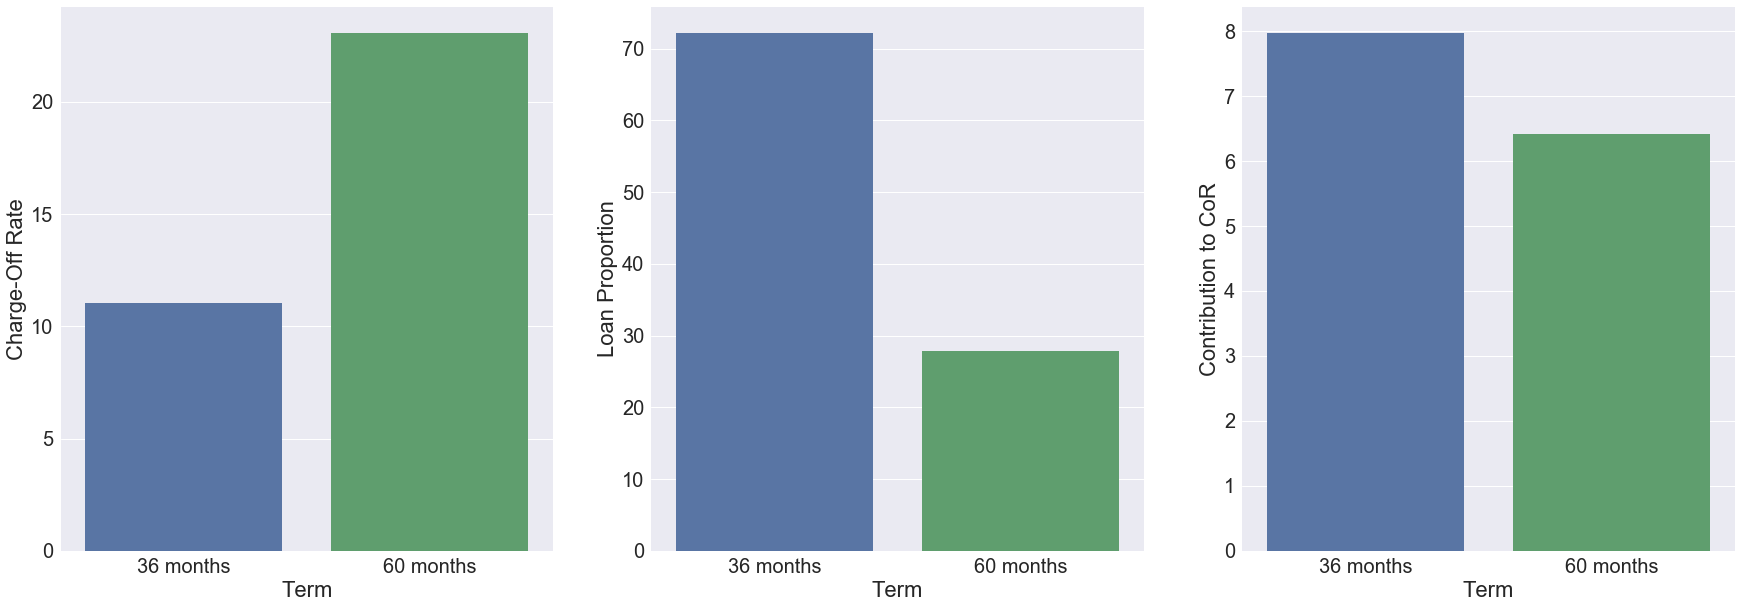

           Charge-Off Rate  Loan Proportion  Contribution to CoR
term                                                            
36 months            11.04            72.17                 7.97
60 months            23.06            27.83                 6.42


In [23]:
# Analyse charge-off rates by term

a = np.round(data[data["charge_off_flag"] == 1].groupby("term").term.count()/data.groupby("term").term.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"term":"Charge-Off Rate"}, inplace = True)
a["Loan Proportion"] = np.round(data.groupby("term").term.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby("term").term.count() / len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 3, 1)

g = sns.barplot(x=a.index, y="Charge-Off Rate", data=a)
g.set(xlabel="Term")

plt.subplot(1, 3, 2)

g = sns.barplot(x=a.index, y="Loan Proportion", data=a)
g.set(xlabel="Term")

plt.subplot(1, 3, 3)

g = sns.barplot(x=a.index, y="Contribution to CoR", data=a)
g.set(xlabel="Term")

plt.show()

print(a)

# Impact of Income on Charge-Off Rates

### Insights:
1. Income deciles rank-order charge off rates in both 36 month and 60 month loans

### Recommendation:
1. Change approval policy by setting minimum annual income requirements - USD 27,600 for 36 mo loans and USD 40,300 for 60 mo loans

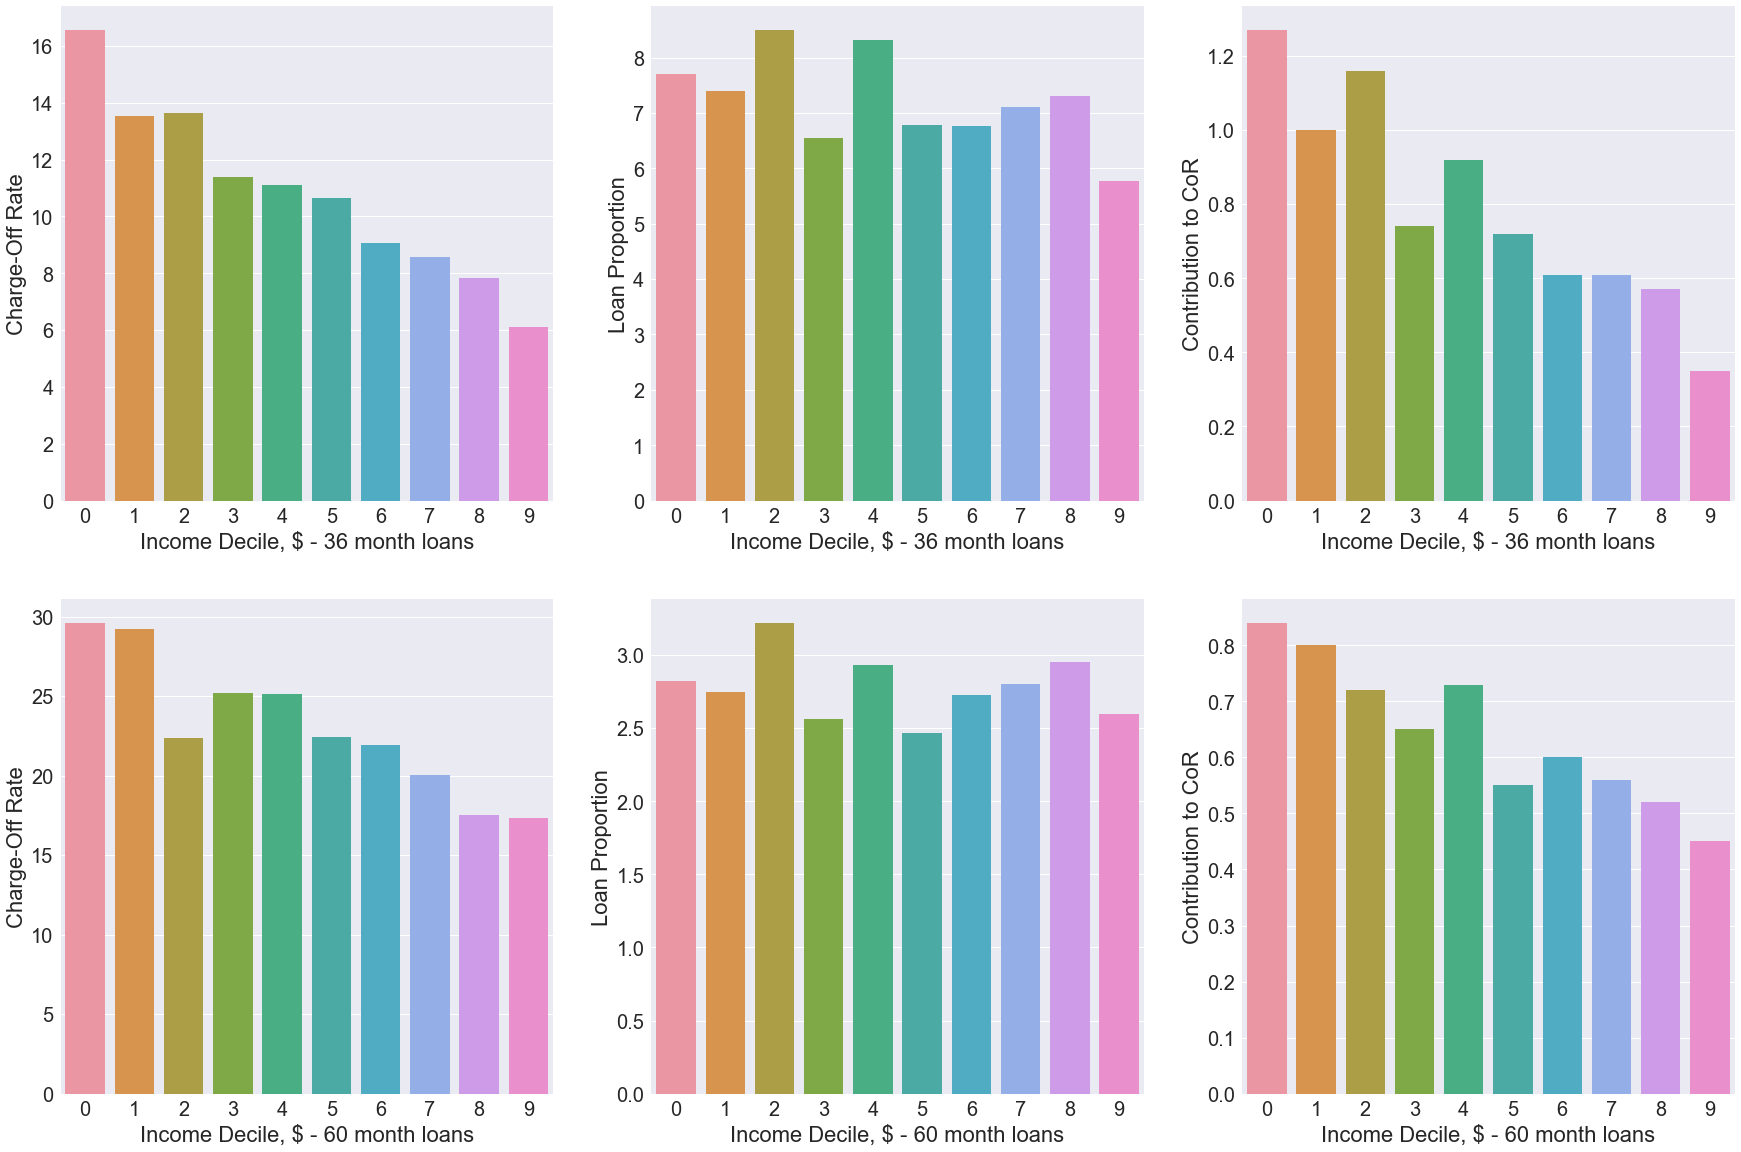

                      Charge-Off Rate  Num Loans  Loan Proportion  \
term      inc_decile                                                
36 months 0                     16.56       2754             7.70   
          1                     13.54       2644             7.39   
          2                     13.64       3043             8.50   
          3                     11.37       2339             6.54   
          4                     11.09       2976             8.32   
          5                     10.66       2429             6.79   
          6                      9.05       2420             6.76   
          7                      8.57       2543             7.11   
          8                      7.84       2616             7.31   
          9                      6.10       2064             5.77   
60 months 0                     29.60       1010             2.82   
          1                     29.20        983             2.75   
          2                     22

In [24]:
# Analyse impact of applicant income on charge_off using inc_decile
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","inc_decile"]).inc_decile.count() / 
             data.groupby(["term","inc_decile"]).inc_decile.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"inc_decile":"Charge-Off Rate"}, inplace = True)
a["Num Loans"] = data.groupby(["term","inc_decile"]).inc_decile.count()
a["Loan Proportion"] = np.round(data.groupby(["term","inc_decile"]).inc_decile.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","inc_decile"]).inc_decile.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

plt.subplot(2, 3, 1)

g = sns.barplot(x=a.loc['36 months', :].index, y="Charge-Off Rate", data=a.loc['36 months', :])
g.set(xlabel="Income Decile, $ - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(x=a.loc['36 months', :].index, y="Loan Proportion", data=a.loc['36 months', :])
g.set(xlabel="Income Decile, $ - 36 month loans")

plt.subplot(2, 3, 3)

g = sns.barplot(x=a.loc['36 months', :].index, y="Contribution to CoR", data=a.loc['36 months', :])
g.set(xlabel="Income Decile, $ - 36 month loans")

plt.subplot(2, 3, 4)

g = sns.barplot(x=a.loc['60 months', :].index, y="Charge-Off Rate", data=a.loc['60 months', :])
g.set(xlabel="Income Decile, $ - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(x=a.loc['60 months', :].index, y="Loan Proportion", data=a.loc['60 months', :])
g.set(xlabel="Income Decile, $ - 60 month loans")

plt.subplot(2, 3, 6)

g = sns.barplot(x=a.loc['60 months', :].index, y="Contribution to CoR", data=a.loc['60 months', :])
g.set(xlabel="Income Decile, $ - 60 month loans")

plt.show()

print(a)

# Work out cut-offs for income based approval
print('Minimum income for 36 mo loan approval: $ ' +
      str(np.round(np.percentile(data["annual_inc"][data["term"]=="36 months"], q=10),1)))

print('Minimum income for 60 mo loan approval: $ ' +
      str(np.round(np.percentile(data["annual_inc"][data["term"]=="60 months"], q=20),1)))

# Impact of Loan Amount on Charge-Off Rates

### Insights:
1. Loan Amount deciles not exactly rank-ordering charge off rates in either 36 month or 60 month loans

### Recommendation:
1. It <i> may </i> be useful to slightly increase the minimum amount to loan for 36 months (all other approve/decline rules must be the same, otherwise increasing loan amount would increase risk). Suggested amount is USD 2,000; current minimum is USD 500

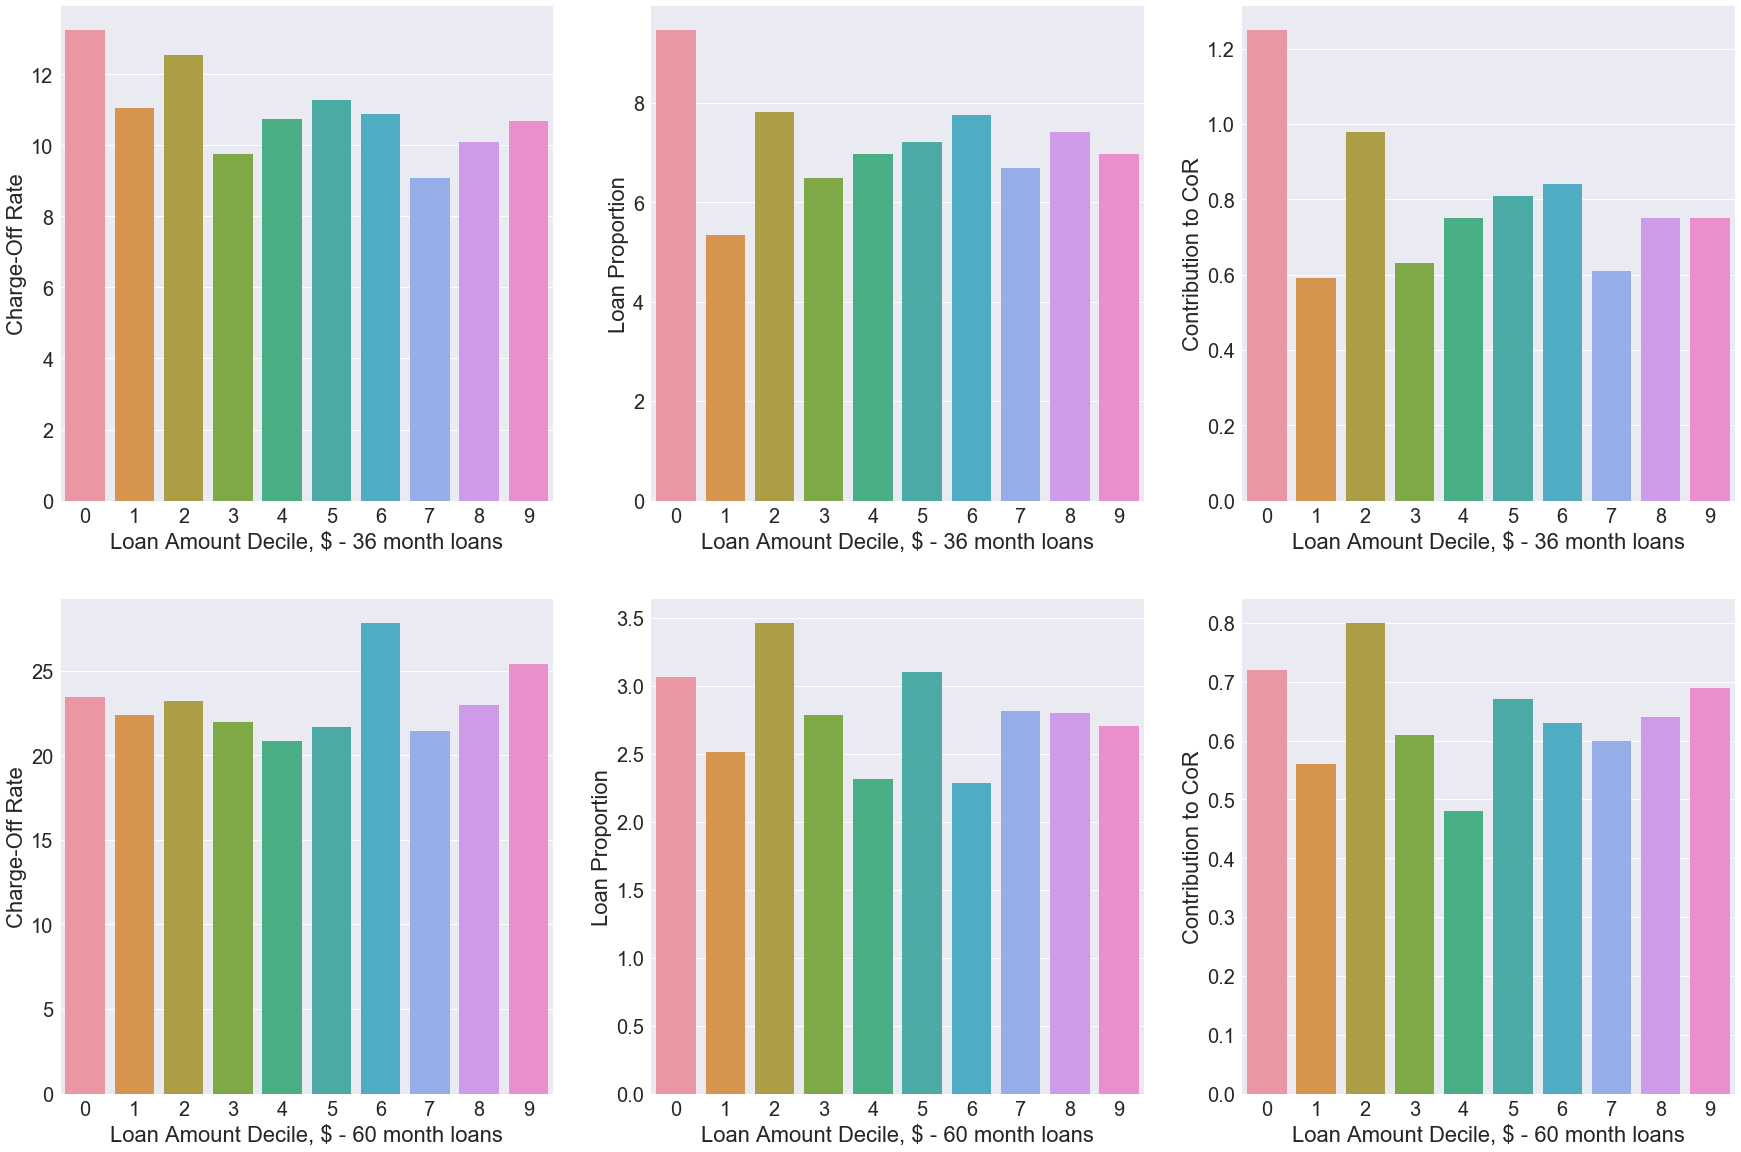

                            Charge-Off Rate  Num Loans  Loan Proportion  \
term      loan_amnt_decile                                                
36 months 0                           13.25       3389             9.47   
          1                           11.04       1911             5.34   
          2                           12.55       2797             7.82   
          3                            9.76       2327             6.50   
          4                           10.75       2494             6.97   
          5                           11.27       2582             7.21   
          6                           10.88       2775             7.75   
          7                            9.09       2399             6.70   
          8                           10.09       2655             7.42   
          9                           10.68       2499             6.98   
60 months 0                           23.45       1096             3.06   
          1              

In [25]:
# Analyse impact of Loan Amount on charge_off using loan_amnt_decile
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","loan_amnt_decile"]).loan_amnt_decile.count() / 
             data.groupby(["term","loan_amnt_decile"]).loan_amnt_decile.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"loan_amnt_decile":"Charge-Off Rate"}, inplace = True)
a["Num Loans"] = data.groupby(["term","loan_amnt_decile"]).loan_amnt_decile.count()
a["Loan Proportion"] = np.round(data.groupby(["term","loan_amnt_decile"]).loan_amnt_decile.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","loan_amnt_decile"]).loan_amnt_decile.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

plt.subplot(2, 3, 1)

g = sns.barplot(x=a.loc['36 months', :].index, y="Charge-Off Rate", data=a.loc['36 months', :])
g.set(xlabel="Loan Amount Decile, $ - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(x=a.loc['36 months', :].index, y="Loan Proportion", data=a.loc['36 months', :])
g.set(xlabel="Loan Amount Decile, $ - 36 month loans")

plt.subplot(2, 3, 3)

g = sns.barplot(x=a.loc['36 months', :].index, y="Contribution to CoR", data=a.loc['36 months', :])
g.set(xlabel="Loan Amount Decile, $ - 36 month loans")

plt.subplot(2, 3, 4)

g = sns.barplot(x=a.loc['60 months', :].index, y="Charge-Off Rate", data=a.loc['60 months', :])
g.set(xlabel="Loan Amount Decile, $ - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(x=a.loc['60 months', :].index, y="Loan Proportion", data=a.loc['60 months', :])
g.set(xlabel="Loan Amount Decile, $ - 60 month loans")

plt.subplot(2, 3, 6)

g = sns.barplot(x=a.loc['60 months', :].index, y="Contribution to CoR", data=a.loc['60 months', :])
g.set(xlabel="Loan Amount Decile, $ - 60 month loans")

plt.show()

print(a)

# Work out cut-offs for Loan Amount based approval
print('Suggested Min Loan Amount for 36 mo term: $ ' +
      str(np.round(np.percentile(data["loan_amnt"][data["term"]=="36 months"], q=5),1)))

# Impact of DTI on Charge-Off Rates

### Insights:
1. DTI buckets (upto DTI = 25) rank-ordering charge off rates particularly in 36 month loans
2. Approvals for applicants with DTI between 25-30 already appear to be stringent; this is helping minimise Charge Off Rates 

### Recommendation:
1. Approval rules for 36 month loans where applicant DTIs are in buckets other than 25-30 should also be stringent

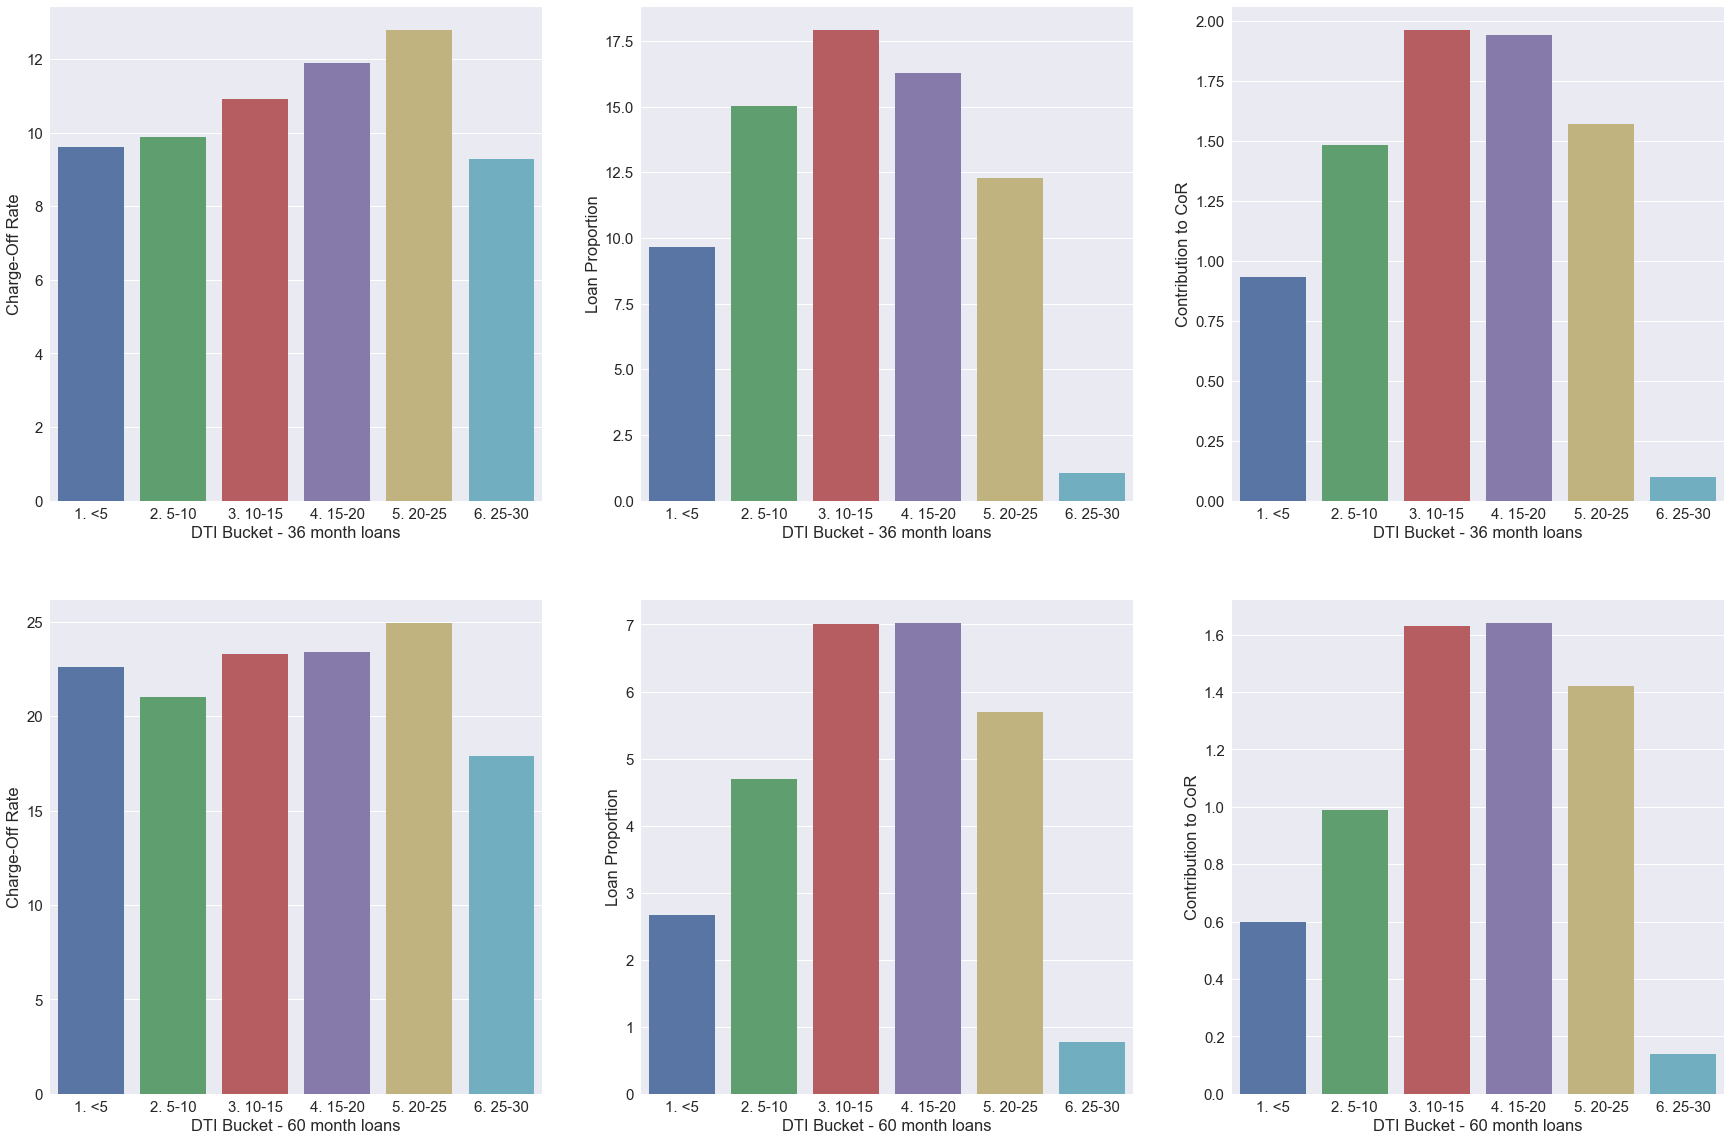

                      Charge-Off Rate  Num Loans  Loan Proportion  \
term      dti_bucket                                                
36 months 1. <5                  9.62       3452             9.65   
          2. 5-10                9.88       5375            15.02   
          3. 10-15              10.92       6411            17.91   
          4. 15-20              11.90       5822            16.27   
          5. 20-25              12.78       4391            12.27   
          6. 25-30               9.28        377             1.05   
60 months 1. <5                 22.61        951             2.66   
          2. 5-10               21.02       1679             4.69   
          3. 10-15              23.31       2505             7.00   
          4. 15-20              23.41       2512             7.02   
          5. 20-25              24.93       2038             5.69   
          6. 25-30              17.88        274             0.77   

                      Contributio

In [26]:
# Analyse impact of DTI on charge_off using dti_bucket
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","dti_bucket"]).dti_bucket.count() / 
             data.groupby(["term","dti_bucket"]).dti_bucket.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"dti_bucket":"Charge-Off Rate"}, inplace = True)
a["Num Loans"] = data.groupby(["term","dti_bucket"]).dti_bucket.count()
a["Loan Proportion"] = np.round(data.groupby(["term","dti_bucket"]).dti_bucket.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","dti_bucket"]).dti_bucket.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=1.5)

plt.subplot(2, 3, 1)

g = sns.barplot(x=a.loc['36 months', :].index, y="Charge-Off Rate", data=a.loc['36 months', :])
g.set(xlabel="DTI Bucket - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(x=a.loc['36 months', :].index, y="Loan Proportion", data=a.loc['36 months', :])
g.set(xlabel="DTI Bucket - 36 month loans")

plt.subplot(2, 3, 3)

g = sns.barplot(x=a.loc['36 months', :].index, y="Contribution to CoR", data=a.loc['36 months', :])
g.set(xlabel="DTI Bucket - 36 month loans")

plt.subplot(2, 3, 4)

g = sns.barplot(x=a.loc['60 months', :].index, y="Charge-Off Rate", data=a.loc['60 months', :])
g.set(xlabel="DTI Bucket - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(x=a.loc['60 months', :].index, y="Loan Proportion", data=a.loc['60 months', :])
g.set(xlabel="DTI Bucket - 60 month loans")

plt.subplot(2, 3, 6)

g = sns.barplot(x=a.loc['60 months', :].index, y="Contribution to CoR", data=a.loc['60 months', :])
g.set(xlabel="DTI Bucket - 60 month loans")

plt.show()

print(a)

# Impact of Loan Grade on Charge-Off Rates

### Insights:
1. As expected, Loan Grades are rank-ordering charge off rates in both 36 and 60 month loans
2. However, some of the low grade loans have a large contribution to Total Charge Off rate visavis size

### Recommendation:
1. Considering that grade G has fewer proportion of loans anyway, consider not making G grade loans at all (OR) definitely increase interest rates significantly for these loans
2. Consider similar actions for 60 month grade F loans as well 

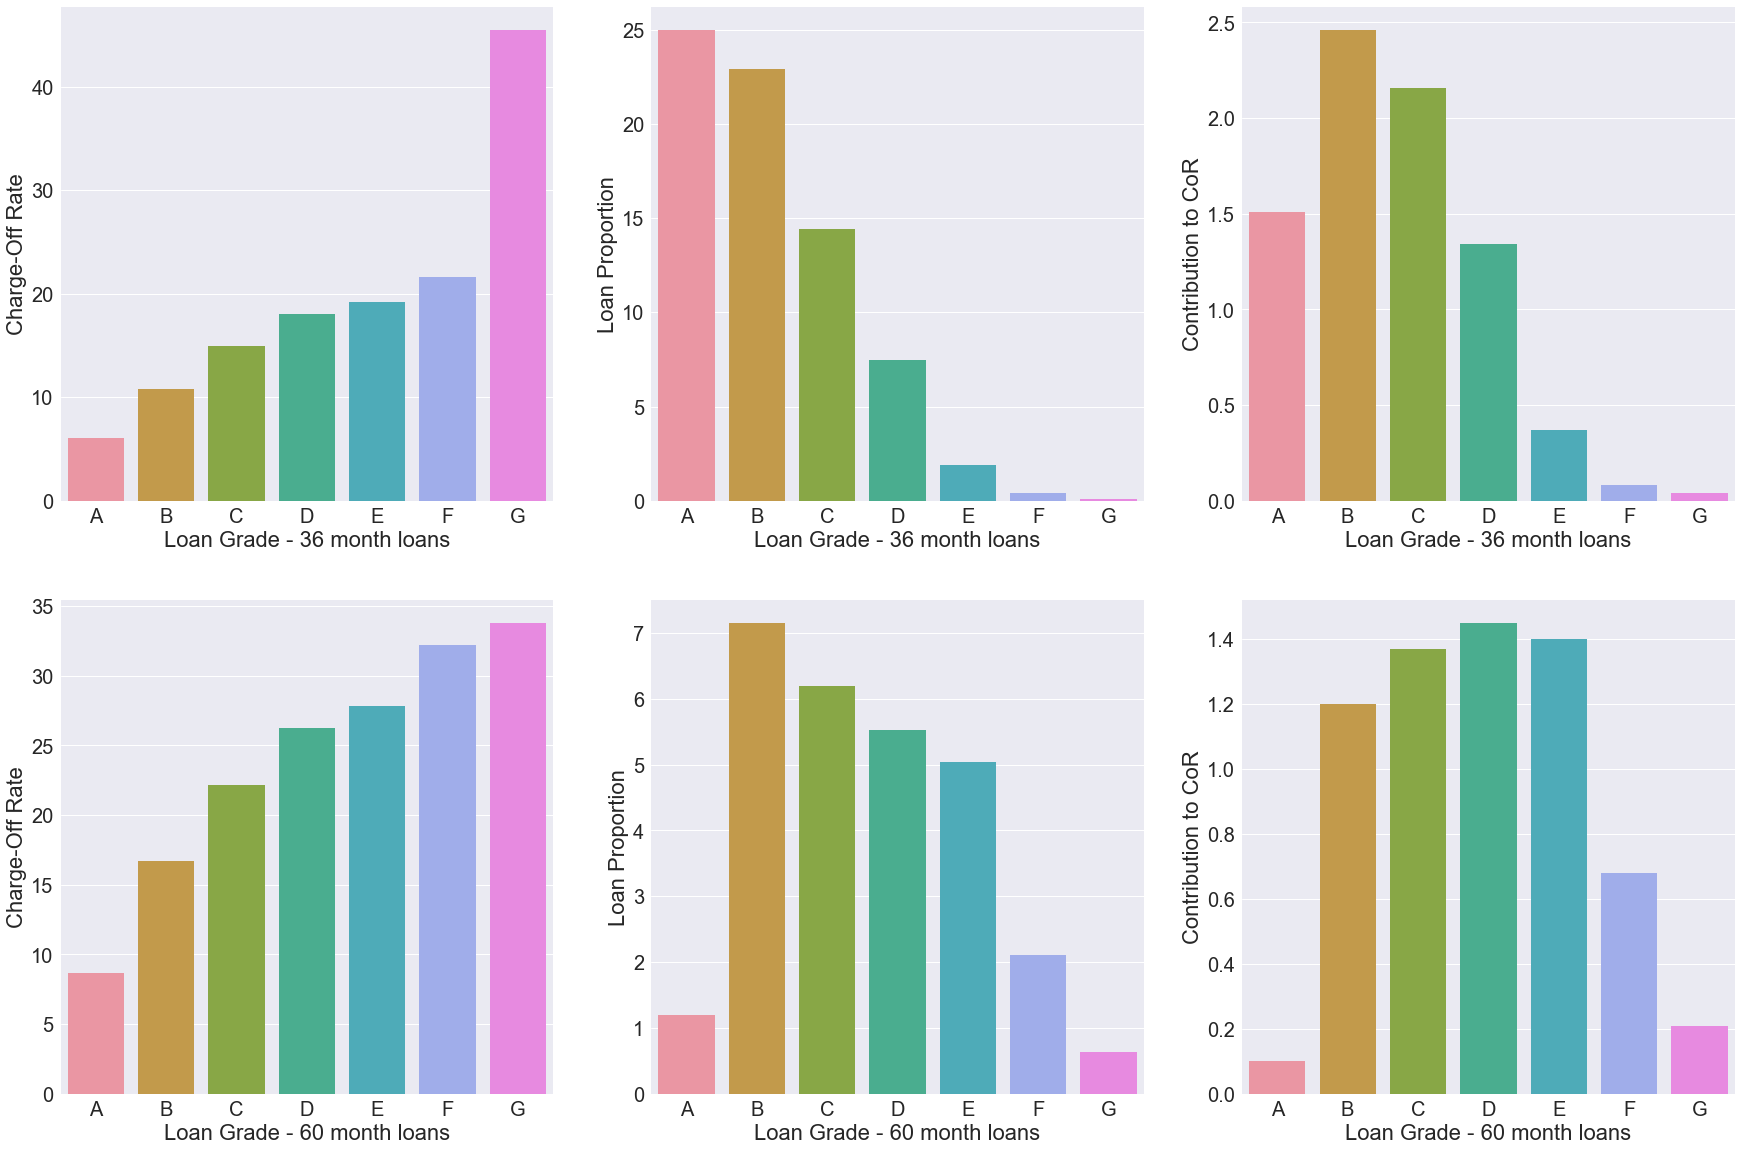

                 Charge-Off Rate  Num Loans  Loan Proportion  \
term      grade                                                
36 months A                 6.04       8938            24.98   
          B                10.76       8199            22.91   
          C                14.97       5163            14.43   
          D                17.99       2673             7.47   
          E                19.18        683             1.91   
          F                21.58        139             0.39   
          G                45.45         33             0.09   
60 months A                 8.69        426             1.19   
          B                16.74       2557             7.15   
          C                22.19       2217             6.19   
          D                26.29       1974             5.52   
          E                27.81       1805             5.04   
          F                32.19        755             2.11   
          G                33.78        

In [27]:
# Analyse impact of grade on charge_off
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","grade"]).grade.count() / 
             data.groupby(["term","grade"]).grade.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"grade":"Charge-Off Rate"}, inplace = True)
a["Num Loans"] = data.groupby(["term","grade"]).grade.count()
a["Loan Proportion"] = np.round(data.groupby(["term","grade"]).grade.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","grade"]).grade.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

plt.subplot(2, 3, 1)

g = sns.barplot(x=a.loc['36 months', :].index, y="Charge-Off Rate", data=a.loc['36 months', :])
g.set(xlabel="Loan Grade - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(x=a.loc['36 months', :].index, y="Loan Proportion", data=a.loc['36 months', :])
g.set(xlabel="Loan Grade - 36 month loans")

plt.subplot(2, 3, 3)

g = sns.barplot(x=a.loc['36 months', :].index, y="Contribution to CoR", data=a.loc['36 months', :])
g.set(xlabel="Loan Grade - 36 month loans")

plt.subplot(2, 3, 4)

g = sns.barplot(x=a.loc['60 months', :].index, y="Charge-Off Rate", data=a.loc['60 months', :])
g.set(xlabel="Loan Grade - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(x=a.loc['60 months', :].index, y="Loan Proportion", data=a.loc['60 months', :])
g.set(xlabel="Loan Grade - 60 month loans")

plt.subplot(2, 3, 6)

g = sns.barplot(x=a.loc['60 months', :].index, y="Contribution to CoR", data=a.loc['60 months', :])
g.set(xlabel="Loan Grade - 60 month loans")

plt.show()

print(a)

# Impact of Applicant Employment Length on Charge-Off Rates

### Insights:
1. Loans for which applicants had not provided Employment Length have much larger likelihood of charge-offs

### Recommendation:
1. Make it impossible to apply for loan without providing Employment Length
2. If necessary, enable applicants to mark that they are self-employed, and validate this prior to loan disbursal
3. If, further, the applicant has been unemployed until the date of application, do not approve

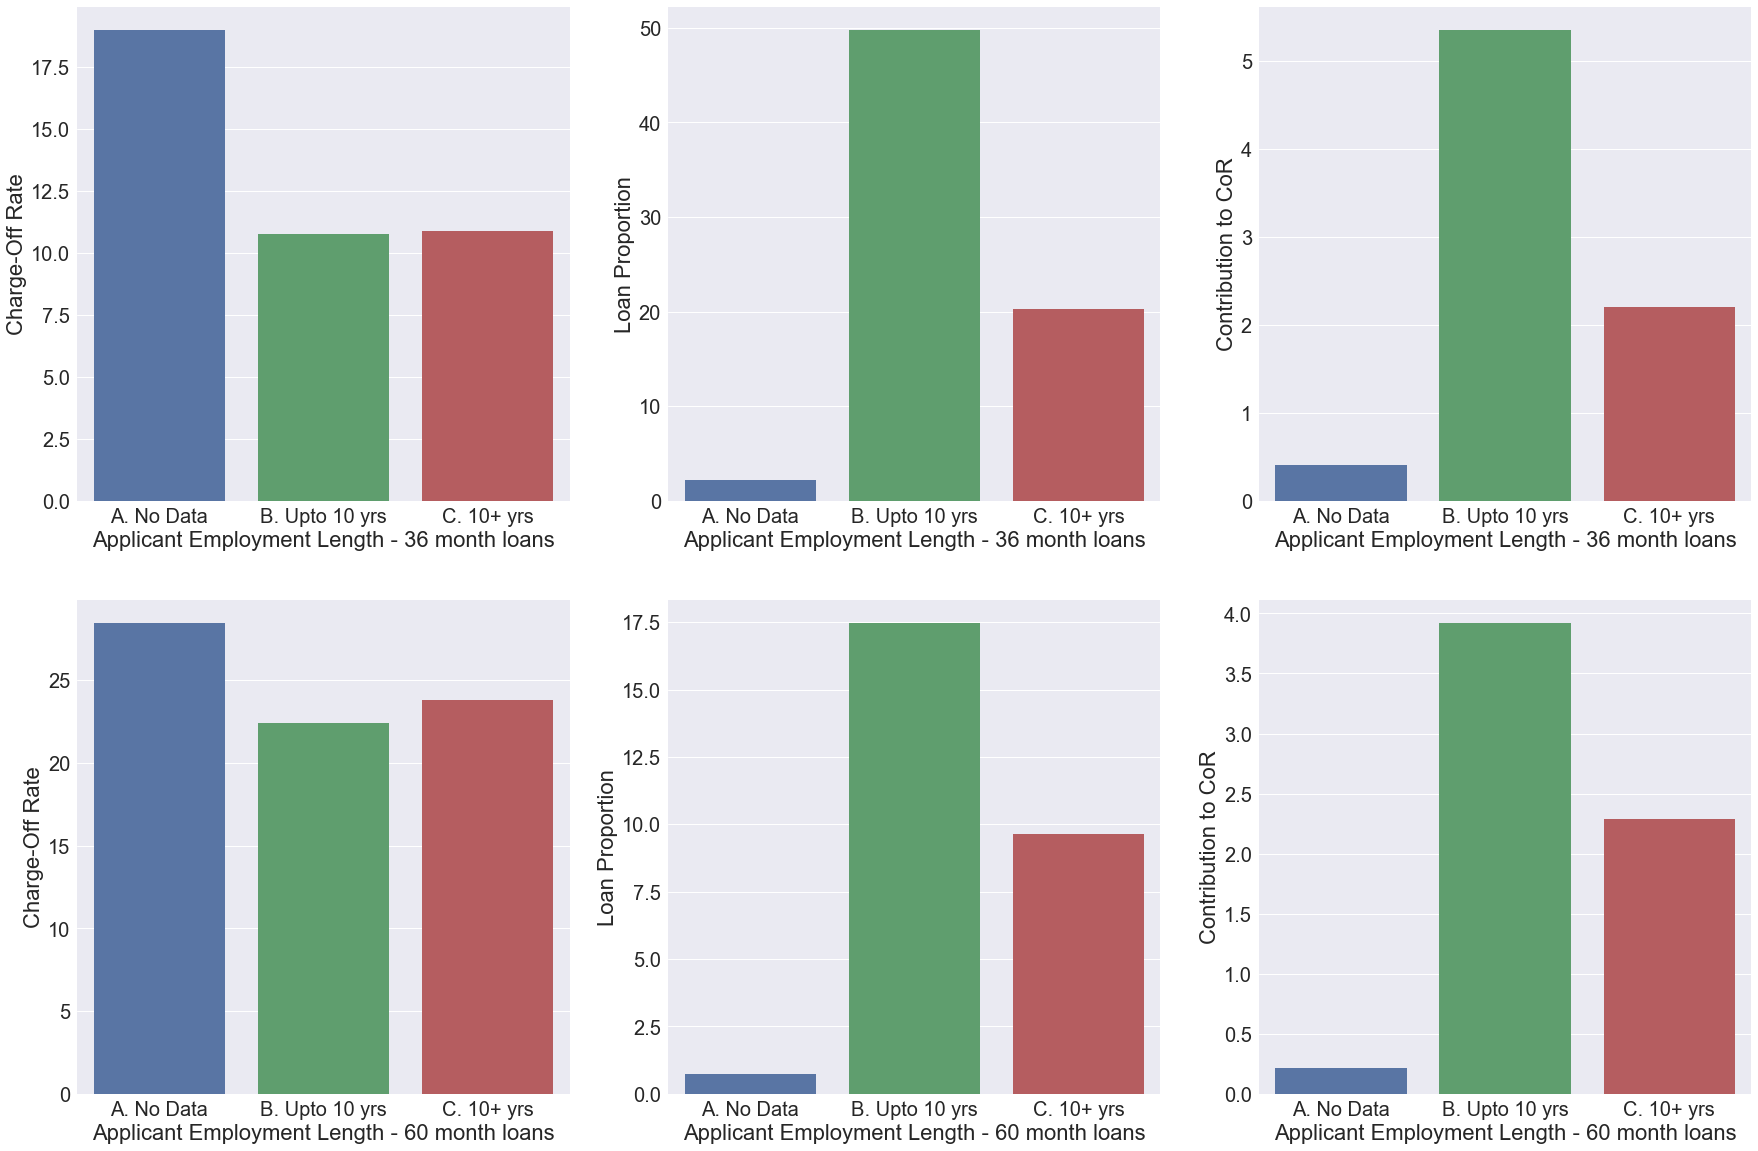

                              Charge-Off Rate  Num Loans  Loan Proportion  \
term      emp_length_grouped                                                
36 months A. No Data                    18.99        774             2.16   
          B. Upto 10 yrs                10.76      17812            49.77   
          C. 10+ yrs                    10.89       7242            20.24   
60 months A. No Data                    28.46        260             0.73   
          B. Upto 10 yrs                22.44       6253            17.47   
          C. 10+ yrs                    23.80       3446             9.63   

                              Contribution to CoR  
term      emp_length_grouped                       
36 months A. No Data                         0.41  
          B. Upto 10 yrs                     5.35  
          C. 10+ yrs                         2.20  
60 months A. No Data                         0.21  
          B. Upto 10 yrs                     3.92  
          C. 10+ yr

In [28]:
# Based on same code below, a first iteration of analysis showed all "emp_length" upto 10 years behave ~similarly in terms of charge off rates; so group these
def emp_length_grouping(x):
    if x == 'A. No Data':
        return x
    if x == 'L. 10+ yrs':
        return 'C. 10+ yrs'
    else:
        return 'B. Upto 10 yrs'

data["emp_length_grouped"] = data["emp_length"].apply(lambda x:emp_length_grouping(x))

# Analyse impact of length of applicant's employment on charge_off
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","emp_length_grouped"]).emp_length_grouped.count() / 
             data.groupby(["term","emp_length_grouped"]).emp_length_grouped.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"emp_length_grouped":"Charge-Off Rate"}, inplace = True)
a["Num Loans"] = data.groupby(["term","emp_length_grouped"]).emp_length_grouped.count()
a["Loan Proportion"] = np.round(data.groupby(["term","emp_length_grouped"]).emp_length_grouped.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","emp_length_grouped"]).emp_length_grouped.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

plt.subplot(2, 3, 1)

g = sns.barplot(x=a.loc['36 months', :].index, y="Charge-Off Rate", data=a.loc['36 months', :])
g.set(xlabel="Applicant Employment Length - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(x=a.loc['36 months', :].index, y="Loan Proportion", data=a.loc['36 months', :])
g.set(xlabel="Applicant Employment Length - 36 month loans")

plt.subplot(2, 3, 3)

g = sns.barplot(x=a.loc['36 months', :].index, y="Contribution to CoR", data=a.loc['36 months', :])
g.set(xlabel="Applicant Employment Length - 36 month loans")

plt.subplot(2, 3, 4)

g = sns.barplot(x=a.loc['60 months', :].index, y="Charge-Off Rate", data=a.loc['60 months', :])
g.set(xlabel="Applicant Employment Length - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(x=a.loc['60 months', :].index, y="Loan Proportion", data=a.loc['60 months', :])
g.set(xlabel="Applicant Employment Length - 60 month loans")

plt.subplot(2, 3, 6)

g = sns.barplot(x=a.loc['60 months', :].index, y="Contribution to CoR", data=a.loc['60 months', :])
g.set(xlabel="Applicant Employment Length - 60 month loans")

plt.show()

print(a)

# Impact of Applicant Home Ownership on Charge-Off Rates

### Insights:
1. Loans for which applicants' Home Ownership status is 'Other' have much larger likelihood of charge-offs
2. As of right now, there are only few such loans, which is helping minimise charge-off rate

### Recommendation:
1. However, if possible, loans must not be disbursed to applicants whose Home Ownership status is 'Other'

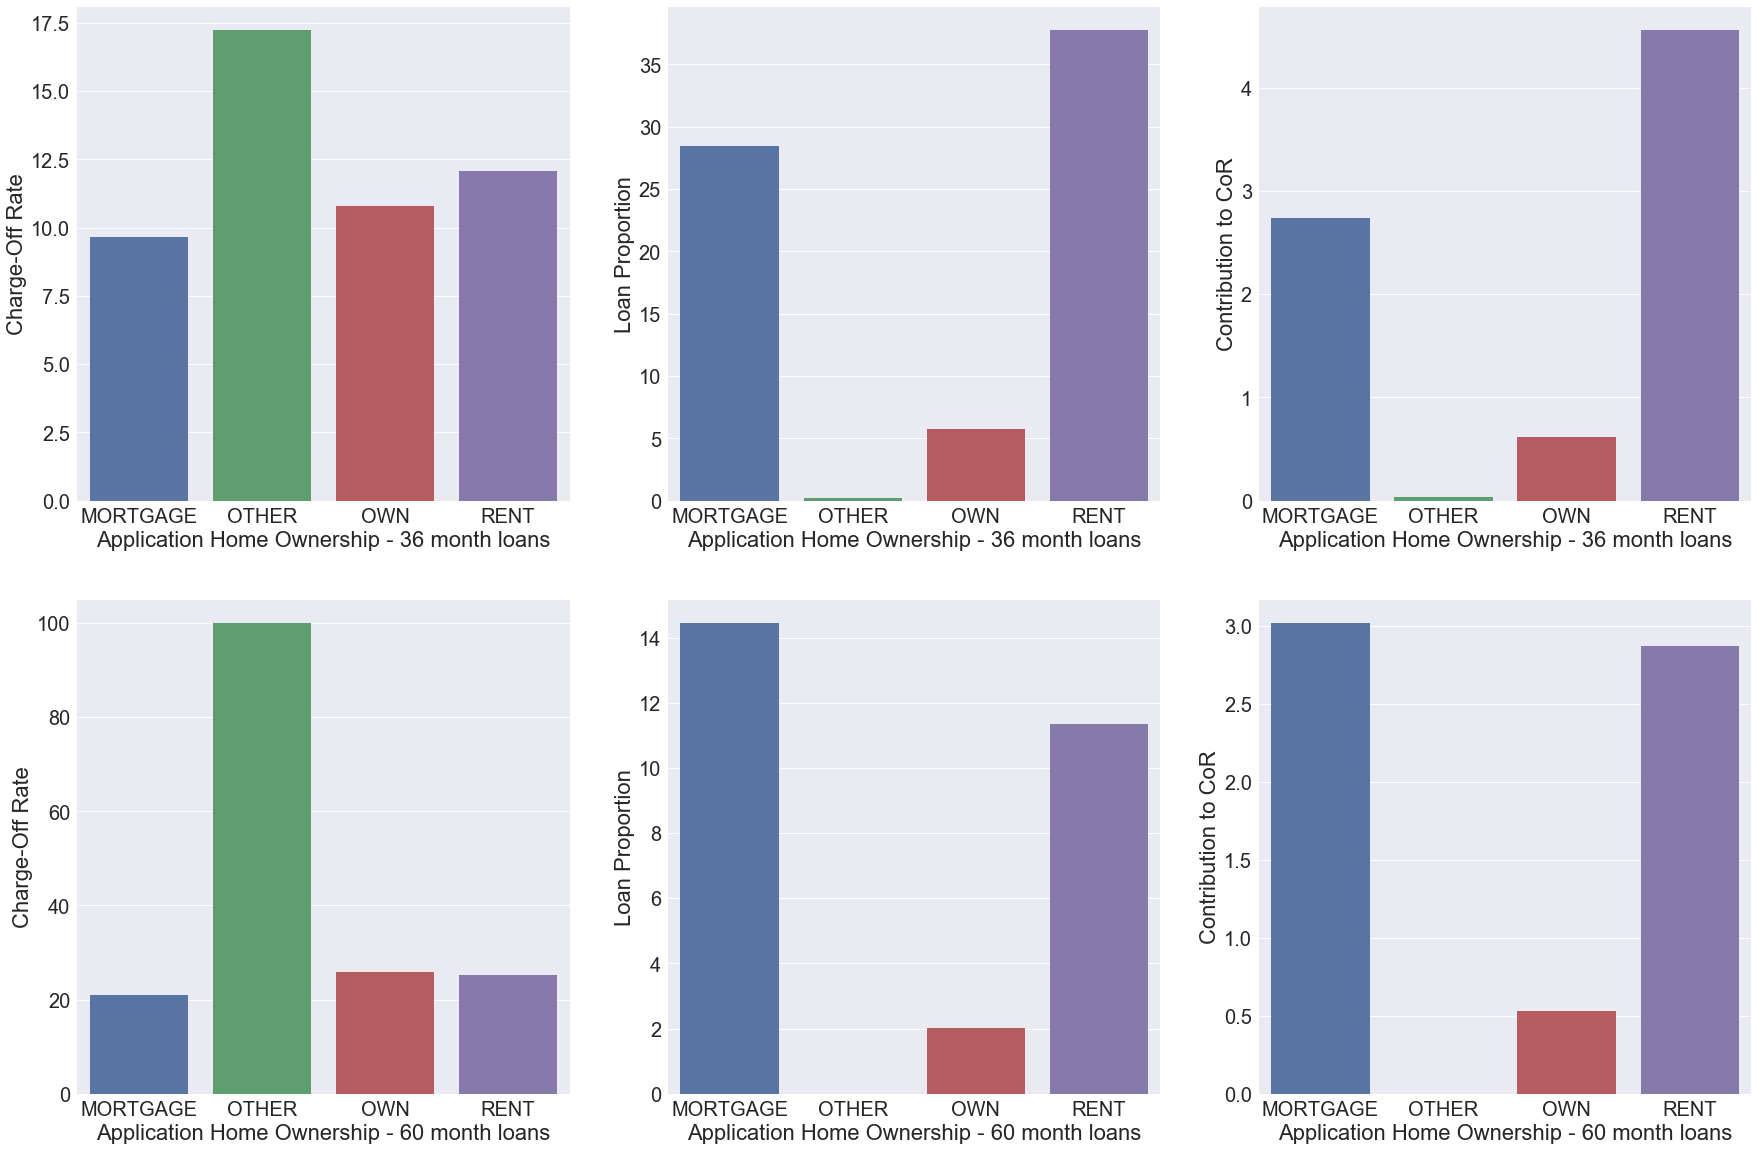

                          Charge-Off Rate  Num Loans  Loan Proportion  \
term      home_ownership                                                
36 months MORTGAGE                   9.65      10173            28.43   
          OTHER                     17.24         87             0.24   
          OWN                       10.81       2054             5.74   
          RENT                      12.08      13514            37.76   
60 months MORTGAGE                  20.89       5171            14.45   
          OTHER                    100.00          1             0.00   
          OWN                       25.86        727             2.03   
          RENT                      25.32       4060            11.34   

                          Contribution to CoR  
term      home_ownership                       
36 months MORTGAGE                       2.74  
          OTHER                          0.04  
          OWN                            0.62  
          RENT               

In [29]:
# Analyse impact of applicant's home ownership status on charge_off
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","home_ownership"]).home_ownership.count() / 
             data.groupby(["term","home_ownership"]).home_ownership.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"home_ownership":"Charge-Off Rate"}, inplace = True)
a["Num Loans"] = data.groupby(["term","home_ownership"]).home_ownership.count()
a["Loan Proportion"] = np.round(data.groupby(["term","home_ownership"]).home_ownership.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","home_ownership"]).home_ownership.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

plt.subplot(2, 3, 1)

g = sns.barplot(x=a.loc['36 months', :].index, y="Charge-Off Rate", data=a.loc['36 months', :])
g.set(xlabel="Application Home Ownership - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(x=a.loc['36 months', :].index, y="Loan Proportion", data=a.loc['36 months', :])
g.set(xlabel="Application Home Ownership - 36 month loans")

plt.subplot(2, 3, 3)

g = sns.barplot(x=a.loc['36 months', :].index, y="Contribution to CoR", data=a.loc['36 months', :])
g.set(xlabel="Application Home Ownership - 36 month loans")

plt.subplot(2, 3, 4)

g = sns.barplot(x=a.loc['60 months', :].index, y="Charge-Off Rate", data=a.loc['60 months', :])
g.set(xlabel="Application Home Ownership - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(x=a.loc['60 months', :].index, y="Loan Proportion", data=a.loc['60 months', :])
g.set(xlabel="Application Home Ownership - 60 month loans")

plt.subplot(2, 3, 6)

g = sns.barplot(x=a.loc['60 months', :].index, y="Contribution to CoR", data=a.loc['60 months', :])
g.set(xlabel= "Application Home Ownership - 60 month loans")

plt.show()

print(a)

# Impact of Applicant Income Verification Status on Charge-Off Rates

### Insights:
1. Income verification status not making a big difference to Overall Charge Off Rate

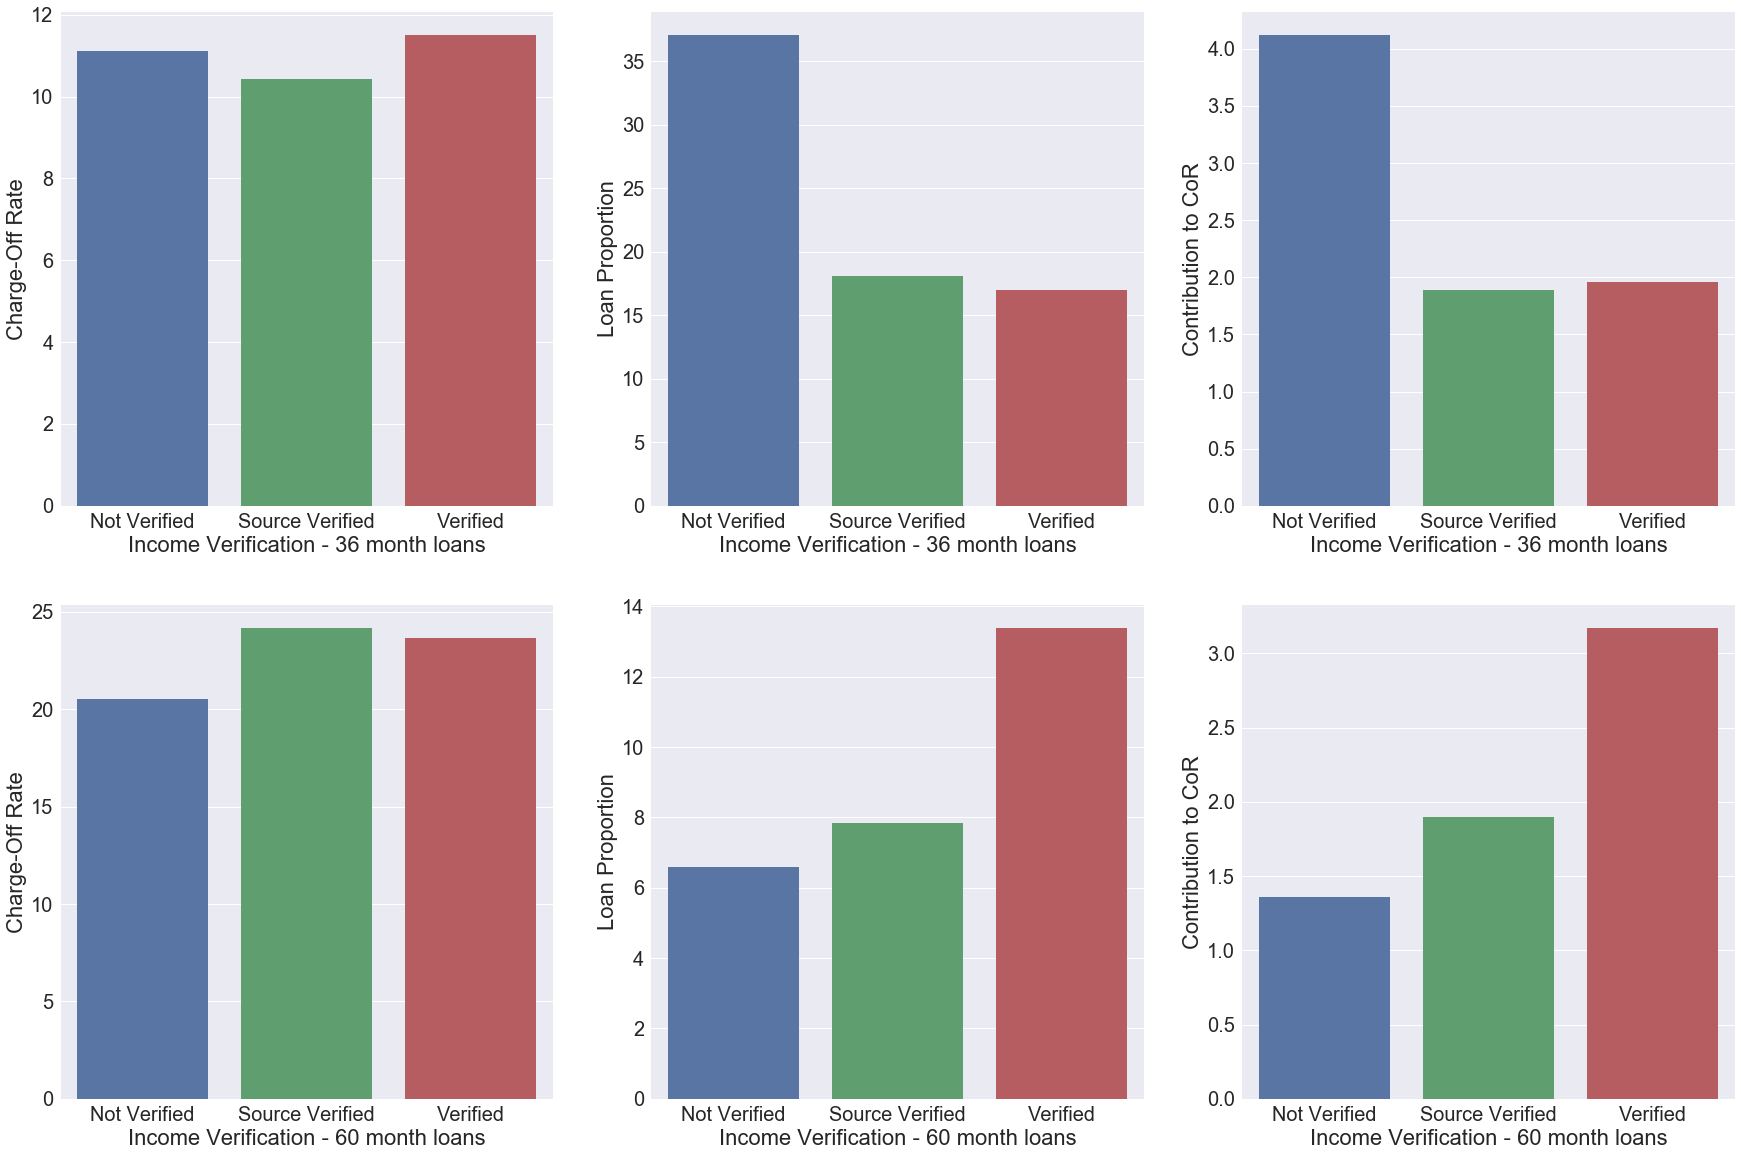

                               Charge-Off Rate  Num Loans  Loan Proportion  \
term      verification_status                                                
36 months Not Verified                   11.12      13259            37.05   
          Source Verified                10.44       6484            18.12   
          Verified                       11.50       6085            17.00   
60 months Not Verified                   20.54       2361             6.60   
          Source Verified                24.16       2811             7.85   
          Verified                       23.67       4787            13.38   

                               Contribution to CoR  
term      verification_status                       
36 months Not Verified                        4.12  
          Source Verified                     1.89  
          Verified                            1.96  
60 months Not Verified                        1.36  
          Source Verified                     1.90  
    

In [30]:
# Analyse impact of applicant's income verification status on charge_off
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","verification_status"]).verification_status.count() / 
             data.groupby(["term","verification_status"]).verification_status.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"verification_status":"Charge-Off Rate"}, inplace = True)
a["Num Loans"] = data.groupby(["term","verification_status"]).verification_status.count()
a["Loan Proportion"] = np.round(data.groupby(["term","verification_status"]).verification_status.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","verification_status"]).verification_status.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

plt.subplot(2, 3, 1)

g = sns.barplot(x=a.loc['36 months', :].index, y="Charge-Off Rate", data=a.loc['36 months', :])
g.set(xlabel="Income Verification - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(x=a.loc['36 months', :].index, y="Loan Proportion", data=a.loc['36 months', :])
g.set(xlabel="Income Verification - 36 month loans")

plt.subplot(2, 3, 3)

g = sns.barplot(x=a.loc['36 months', :].index, y="Contribution to CoR", data=a.loc['36 months', :])
g.set(xlabel="Income Verification - 36 month loans")

plt.subplot(2, 3, 4)

g = sns.barplot(x=a.loc['60 months', :].index, y="Charge-Off Rate", data=a.loc['60 months', :])
g.set(xlabel="Income Verification - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(x=a.loc['60 months', :].index, y="Loan Proportion", data=a.loc['60 months', :])
g.set(xlabel="Income Verification - 60 month loans")

plt.subplot(2, 3, 6)

g = sns.barplot(x=a.loc['60 months', :].index, y="Contribution to CoR", data=a.loc['60 months', :])
g.set(xlabel="Income Verification - 60 month loans")

plt.show()

print(a)

# Impact of Applicant Borrowing Purpose on Charge-Off Rates

### Insights:
1. 'Small Business' is the one purpose which both has high charge-off rate and demand (as measured by proportion of loans); the result is high contribution to overall charge-off rate
2. Loans where applicants's purpose is 'Other' also has relatively high charge-off rates and demand
3. There are other purposes seeing high charge-off rate, but have relatively low demand, so not very important

### Recommendation:
1. Reject loans for Small Business purposes
1. Implement stringent approval rules where applicant's purpose of application is 'Other'

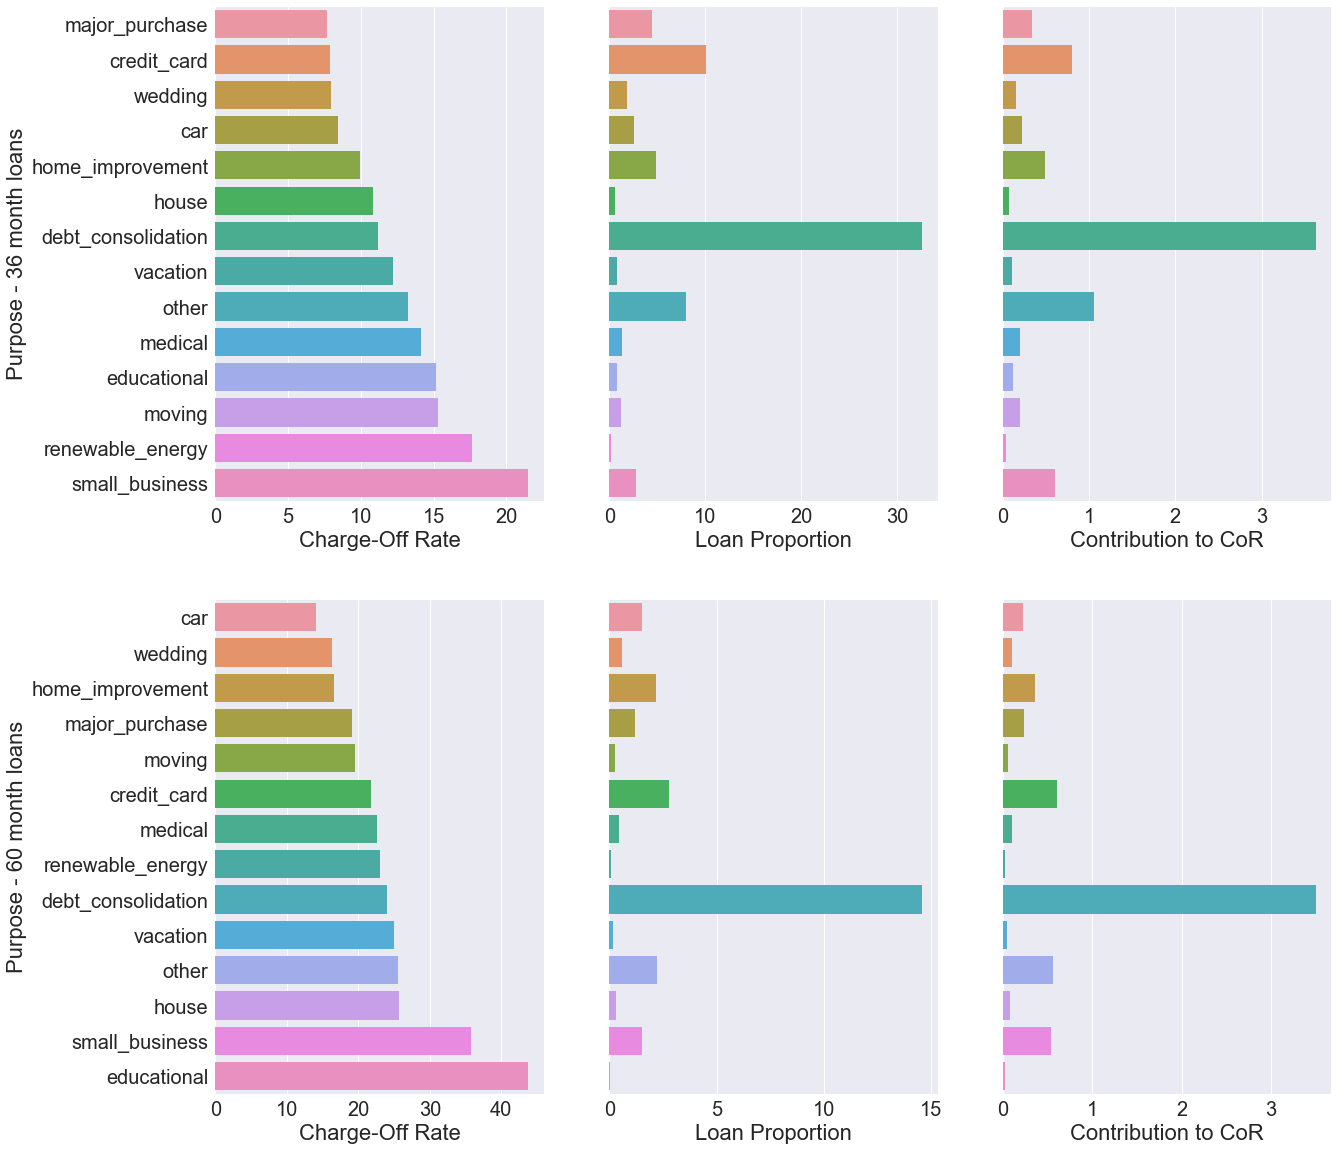

                              Charge-Off Rate  Num Loans  Loan Proportion  \
term      purpose                                                           
36 months major_purchase                 7.65       1594             4.45   
          credit_card                    7.87       3622            10.12   
          wedding                        7.93        668             1.87   
          car                            8.44        924             2.58   
          home_improvement               9.91       1736             4.85   
          house                         10.81        222             0.62   
          debt_consolidation            11.16      11648            32.55   
          vacation                      12.21        303             0.85   
          other                         13.27       2849             7.96   
60 months car                           14.03        549             1.53   
36 months medical                       14.11        482             1.35   

In [31]:
# Analyse impact of applicant's borrowing purpose on charge_off
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","purpose"]).purpose.count() / 
             data.groupby(["term","purpose"]).purpose.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"purpose":"Charge-Off Rate"}, inplace = True)
a = pd.DataFrame(a).sort_values("Charge-Off Rate")
a["Num Loans"] = data.groupby(["term","purpose"]).purpose.count()
a["Loan Proportion"] = np.round(data.groupby(["term","purpose"]).purpose.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","purpose"]).purpose.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=2)
plt.sharey = True

plt.subplot(2, 3, 1)

g = sns.barplot(y=a.loc['36 months', :].index, x="Charge-Off Rate", data=a.loc['36 months', :])
g.set(ylabel="Purpose - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(y=a.loc['36 months', :].index, x="Loan Proportion", data=a.loc['36 months', :])
g.set(ylabel='')
g.get_yaxis().set_visible(False)

plt.subplot(2, 3, 3)

g = sns.barplot(y=a.loc['36 months', :].index, x="Contribution to CoR", data=a.loc['36 months', :])
g.set(ylabel='')
g.get_yaxis().set_visible(False)

plt.subplot(2, 3, 4)

g = sns.barplot(y=a.loc['60 months', :].index, x="Charge-Off Rate", data=a.loc['60 months', :])
g.set(ylabel="Purpose - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(y=a.loc['60 months', :].index, x="Loan Proportion", data=a.loc['60 months', :])
g.set(ylabel='')
g.get_yaxis().set_visible(False)

plt.subplot(2, 3, 6)

g = sns.barplot(y=a.loc['60 months', :].index, x="Contribution to CoR", data=a.loc['60 months', :])
g.set(ylabel='')
g.get_yaxis().set_visible(False)

plt.show()

print(a)

# Impact of Applicant Location on Charge-Off Rates

### Insights:
1. Applicant's region not making a big difference to Overall Charge Off Rate

In [32]:
# Too many zip codes and states for analysis; so group them into regions using publicly available data -- http://code.activestate.com/recipes/580661-states-to-regions/
# N - North East W - West M - Mid West S - South O - Other

states = {
        'AK': 'Other',
        'AL': 'South',
        'AR': 'South',
        'AS': 'Other',
        'AZ': 'West',
        'CA': 'West',
        'CO': 'West',
        'CT': 'North East',
        'DC': 'North East',
        'DE': 'North East',
        'FL': 'South',
        'GA': 'South',
        'GU': 'Other',
        'HI': 'Other',
        'IA': 'Midwest',
        'ID': 'West',
        'IL': 'Midwest',
        'IN': 'Midwest',
        'KS': 'Midwest',
        'KY': 'South',
        'LA': 'South',
        'MA': 'North East',
        'MD': 'North East',
        'ME': 'North East',
        'MI': 'West',
        'MN': 'Midwest',
        'MO': 'Midwest',
        'MP': 'Other',
        'MS': 'South',
        'MT': 'West',
        'NA': 'Other',
        'NC': 'South',
        'ND': 'Midwest',
        'NE': 'West',
        'NH': 'North East',
        'NJ': 'North East',
        'NM': 'West',
        'NV': 'West',
        'NY': 'North East',
        'OH': 'Midwest',
        'OK': 'South',
        'OR': 'West',
        'PA': 'North East',
        'PR': 'Other',
        'RI': 'North East',
        'SC': 'South',
        'SD': 'Midwest',
        'TN': 'South',
        'TX': 'South',
        'UT': 'West',
        'VA': 'South',
        'VI': 'Other',
        'VT': 'North East',
        'WA': 'West',
        'WI': 'Midwest',
        'WV': 'South',
        'WY': 'West'
}

# Create applicant region column using this dictionary
data["region"] = data["addr_state"].apply(lambda x:states[x])

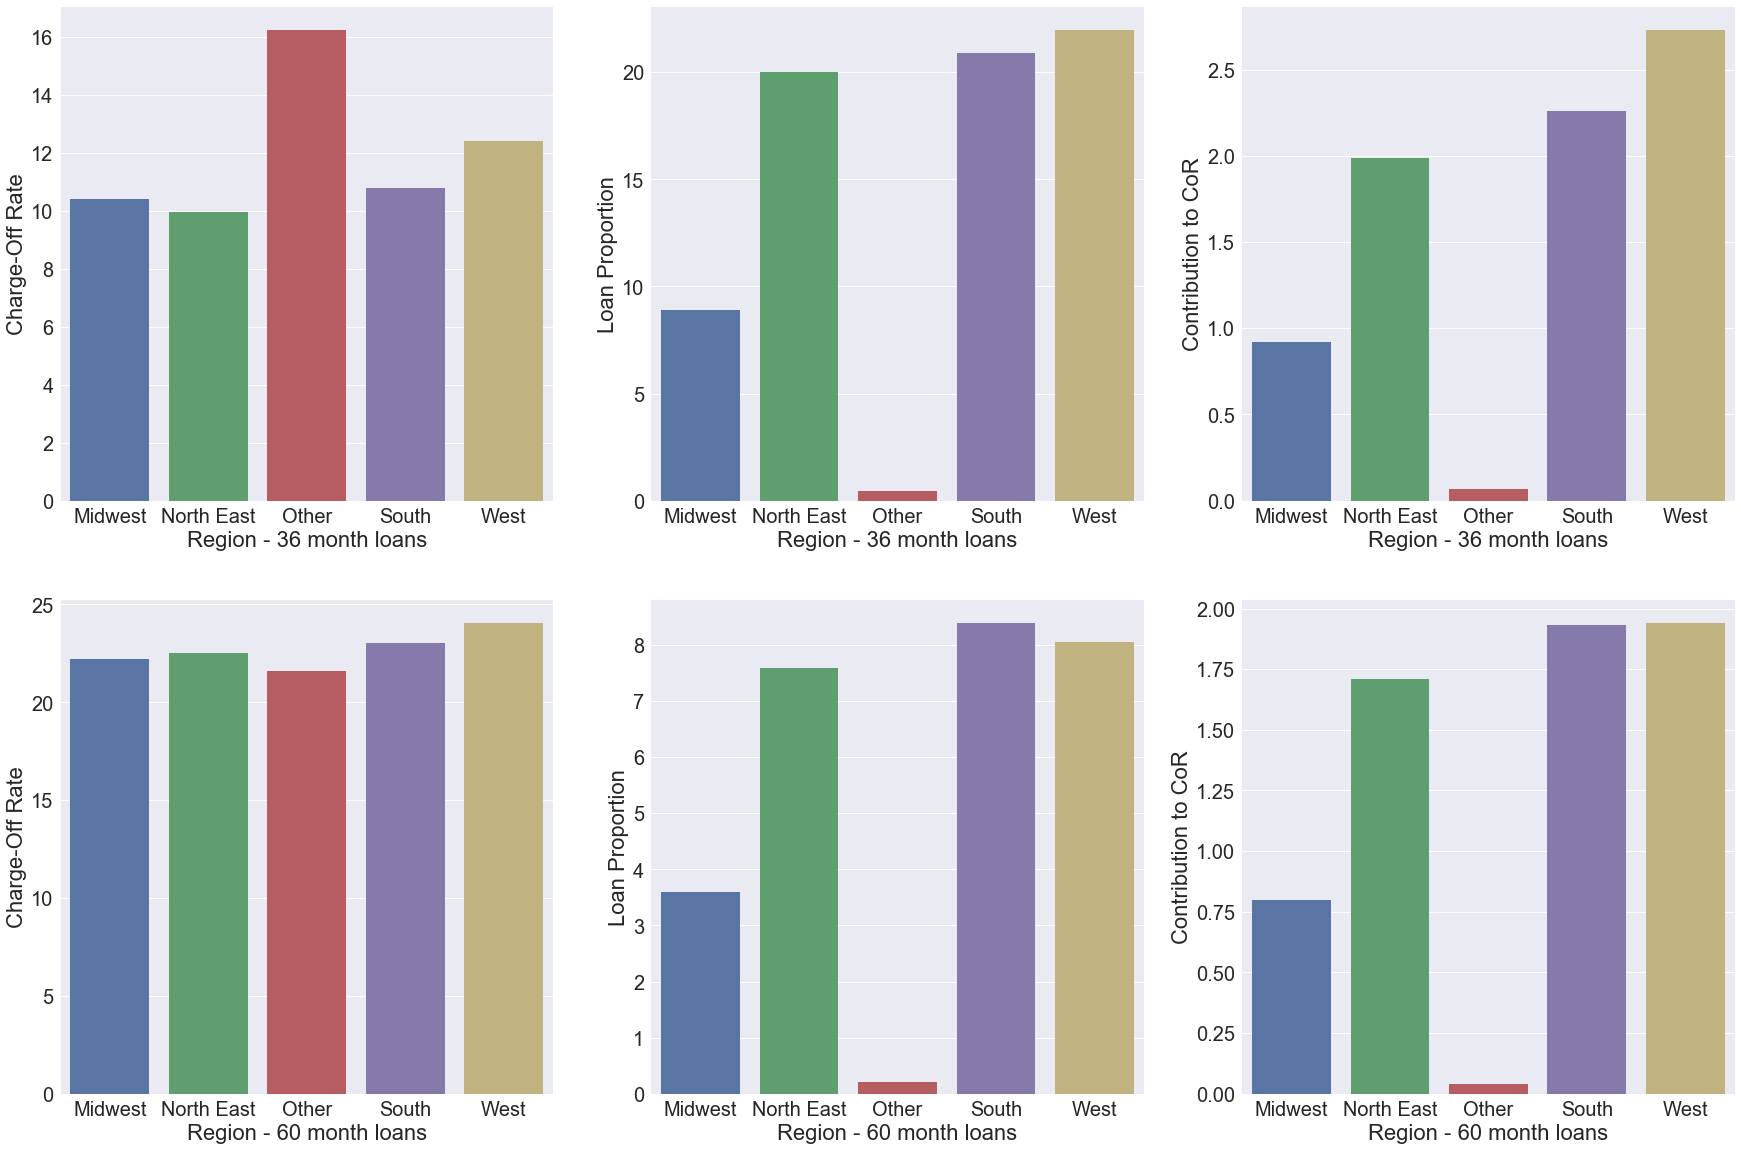

                      Charge-Off Rate  Num Loans  Loan Proportion  \
term      region                                                    
36 months Midwest               10.39       3186             8.90   
          North East             9.97       7153            19.99   
          Other                 16.23        154             0.43   
          South                 10.80       7473            20.88   
          West                  12.41       7862            21.97   
60 months Midwest               22.19       1289             3.60   
          North East            22.53       2712             7.58   
          Other                 21.62         74             0.21   
          South                 23.02       3002             8.39   
          West                  24.05       2882             8.05   

                      Contribution to CoR  
term      region                           
36 months Midwest                    0.92  
          North East                 1.

In [33]:
# Analyse impact of applicant's region on charge_off
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","region"]).region.count() / 
             data.groupby(["term","region"]).region.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"region":"Charge-Off Rate"}, inplace = True)
a["Num Loans"] = data.groupby(["term","region"]).region.count()
a["Loan Proportion"] = np.round(data.groupby(["term","region"]).region.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","region"]).region.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

plt.subplot(2, 3, 1)

g = sns.barplot(x=a.loc['36 months', :].index, y="Charge-Off Rate", data=a.loc['36 months', :])
g.set(xlabel="Region - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(x=a.loc['36 months', :].index, y="Loan Proportion", data=a.loc['36 months', :])
g.set(xlabel="Region - 36 month loans")

plt.subplot(2, 3, 3)

g = sns.barplot(x=a.loc['36 months', :].index, y="Contribution to CoR", data=a.loc['36 months', :])
g.set(xlabel="Region - 36 month loans")

plt.subplot(2, 3, 4)

g = sns.barplot(x=a.loc['60 months', :].index, y="Charge-Off Rate", data=a.loc['60 months', :])
g.set(xlabel="Region - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(x=a.loc['60 months', :].index, y="Loan Proportion", data=a.loc['60 months', :])
g.set(xlabel="Region - 60 month loans")

plt.subplot(2, 3, 6)

g = sns.barplot(x=a.loc['60 months', :].index, y="Contribution to CoR", data=a.loc['60 months', :])
g.set(xlabel="Region - 60 month loans")

plt.show()

print(a)

# Impact of Applicant's Prior 2-Yrs Delinquency Status on Charge-Off Rates

### Insights:
1. Loan disbursal already mostly being done only in the segment where applicants have low delinquency incidents in prior 2-yrs
2. Low contribution to Overall Charge-Off Rate from applicants who had high delinquency incidents in prior 2 yrs

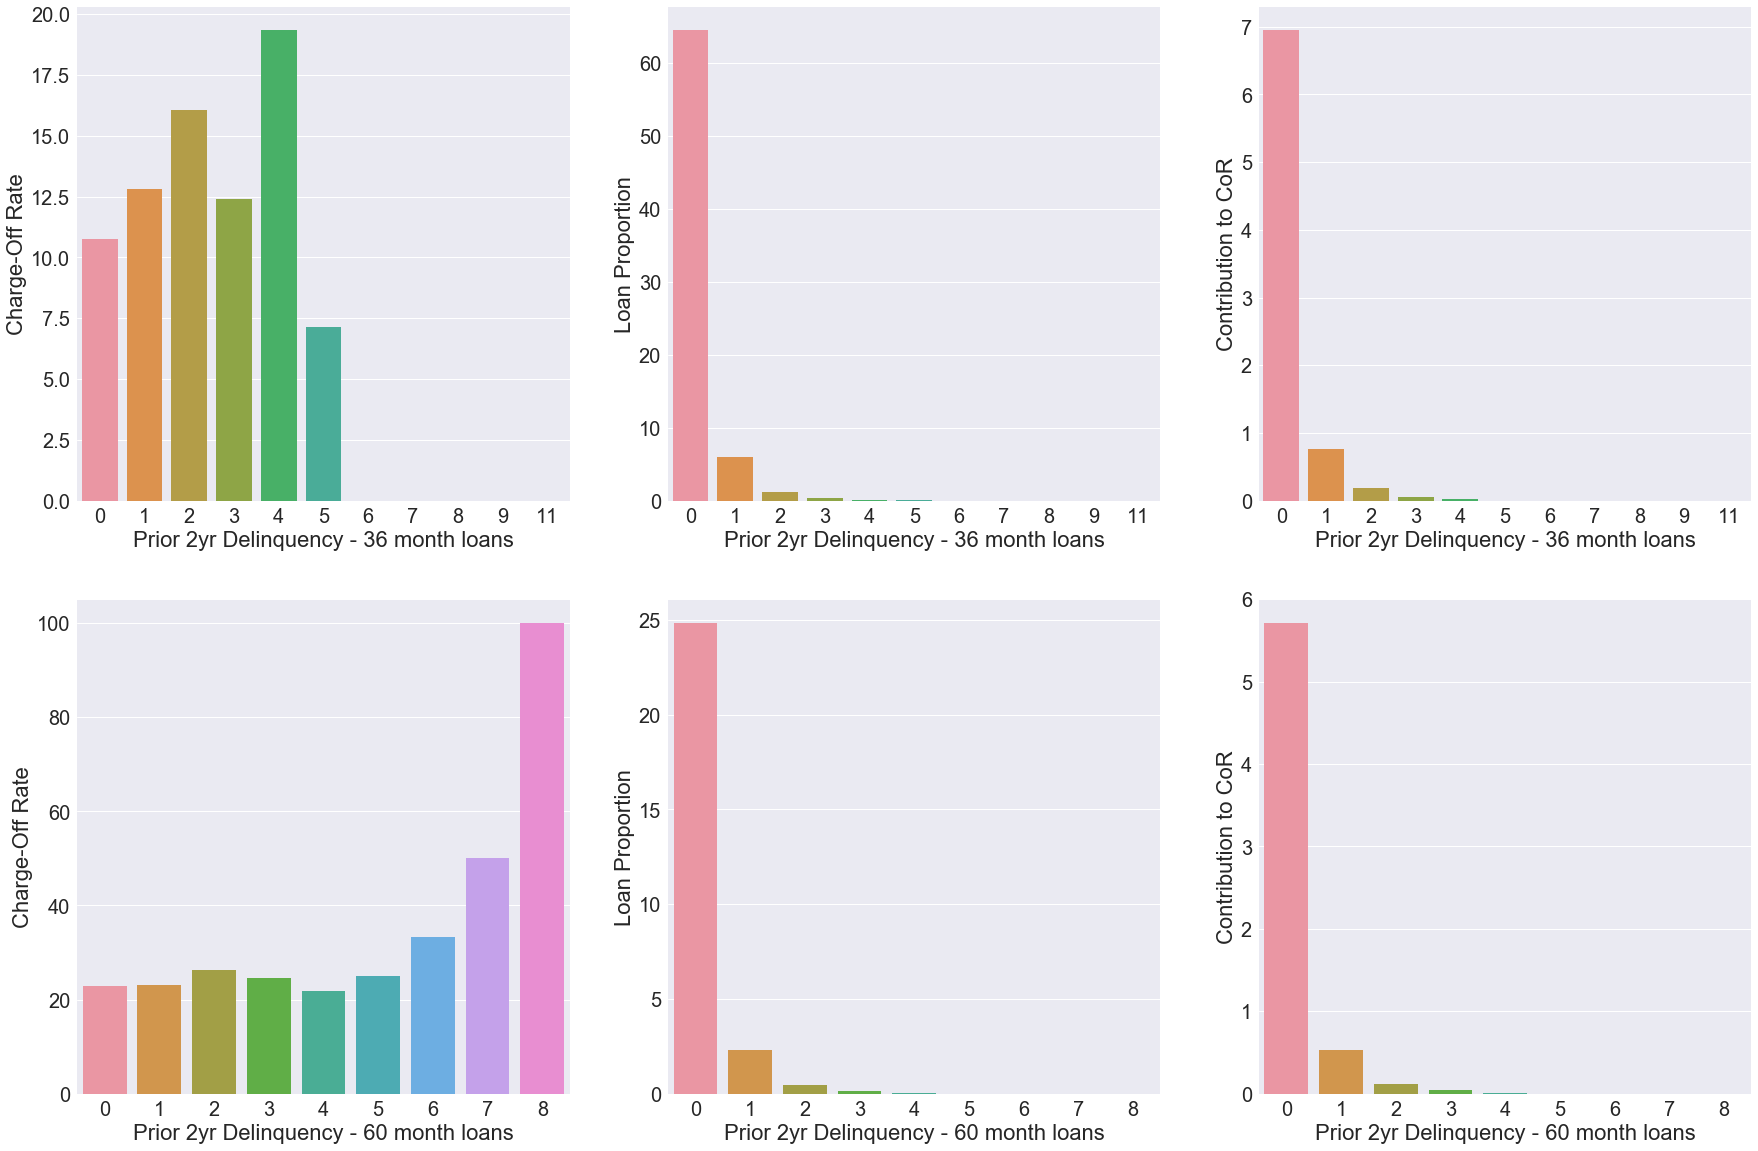

                       Charge-Off Rate  Num Loans  Loan Proportion  \
term      delinq_2yrs                                                
36 months 0                      10.77      23075            64.48   
          1                      12.82       2129             5.95   
          2                      16.05        430             1.20   
          3                      12.41        137             0.38   
          4                      19.35         31             0.09   
          5                       7.14         14             0.04   
          6                        NaN          7             0.02   
          7                        NaN          2             0.01   
          8                        NaN          1             0.00   
          9                        NaN          1             0.00   
          11                       NaN          1             0.00   
60 months 0                      22.98       8885            24.83   
          1         

In [34]:
# Analyse impact of Prior 2-yrs Delinquency ("delinq_2yrs") on charge_off
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","delinq_2yrs"]).delinq_2yrs.count() / 
             data.groupby(["term","delinq_2yrs"]).delinq_2yrs.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"delinq_2yrs":"Charge-Off Rate"}, inplace = True)
a["Num Loans"] = data.groupby(["term","delinq_2yrs"]).delinq_2yrs.count()
a["Loan Proportion"] = np.round(data.groupby(["term","delinq_2yrs"]).delinq_2yrs.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","delinq_2yrs"]).delinq_2yrs.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

plt.subplot(2, 3, 1)

g = sns.barplot(x=a.loc['36 months', :].index, y="Charge-Off Rate", data=a.loc['36 months', :])
g.set(xlabel="Prior 2yr Delinquency - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(x=a.loc['36 months', :].index, y="Loan Proportion", data=a.loc['36 months', :])
g.set(xlabel="Prior 2yr Delinquency - 36 month loans")

plt.subplot(2, 3, 3)

g = sns.barplot(x=a.loc['36 months', :].index, y="Contribution to CoR", data=a.loc['36 months', :])
g.set(xlabel="Prior 2yr Delinquency - 36 month loans")

plt.subplot(2, 3, 4)

g = sns.barplot(x=a.loc['60 months', :].index, y="Charge-Off Rate", data=a.loc['60 months', :])
g.set(xlabel="Prior 2yr Delinquency - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(x=a.loc['60 months', :].index, y="Loan Proportion", data=a.loc['60 months', :])
g.set(xlabel="Prior 2yr Delinquency - 60 month loans")

plt.subplot(2, 3, 6)

g = sns.barplot(x=a.loc['60 months', :].index, y="Contribution to CoR", data=a.loc['60 months', :])
g.set(xlabel="Prior 2yr Delinquency - 60 month loans")

plt.show()

print(a)

# Impact of Applicant's Prior 6M Inquiries on Charge-Off Rates

### Insights:
1. Loan disbursal already mostly being done only in the segment where applicants made low number of inquiries in prior 6M
2. Low contribution to Overall Charge-Off Rate from applicants who made high number of inquiries

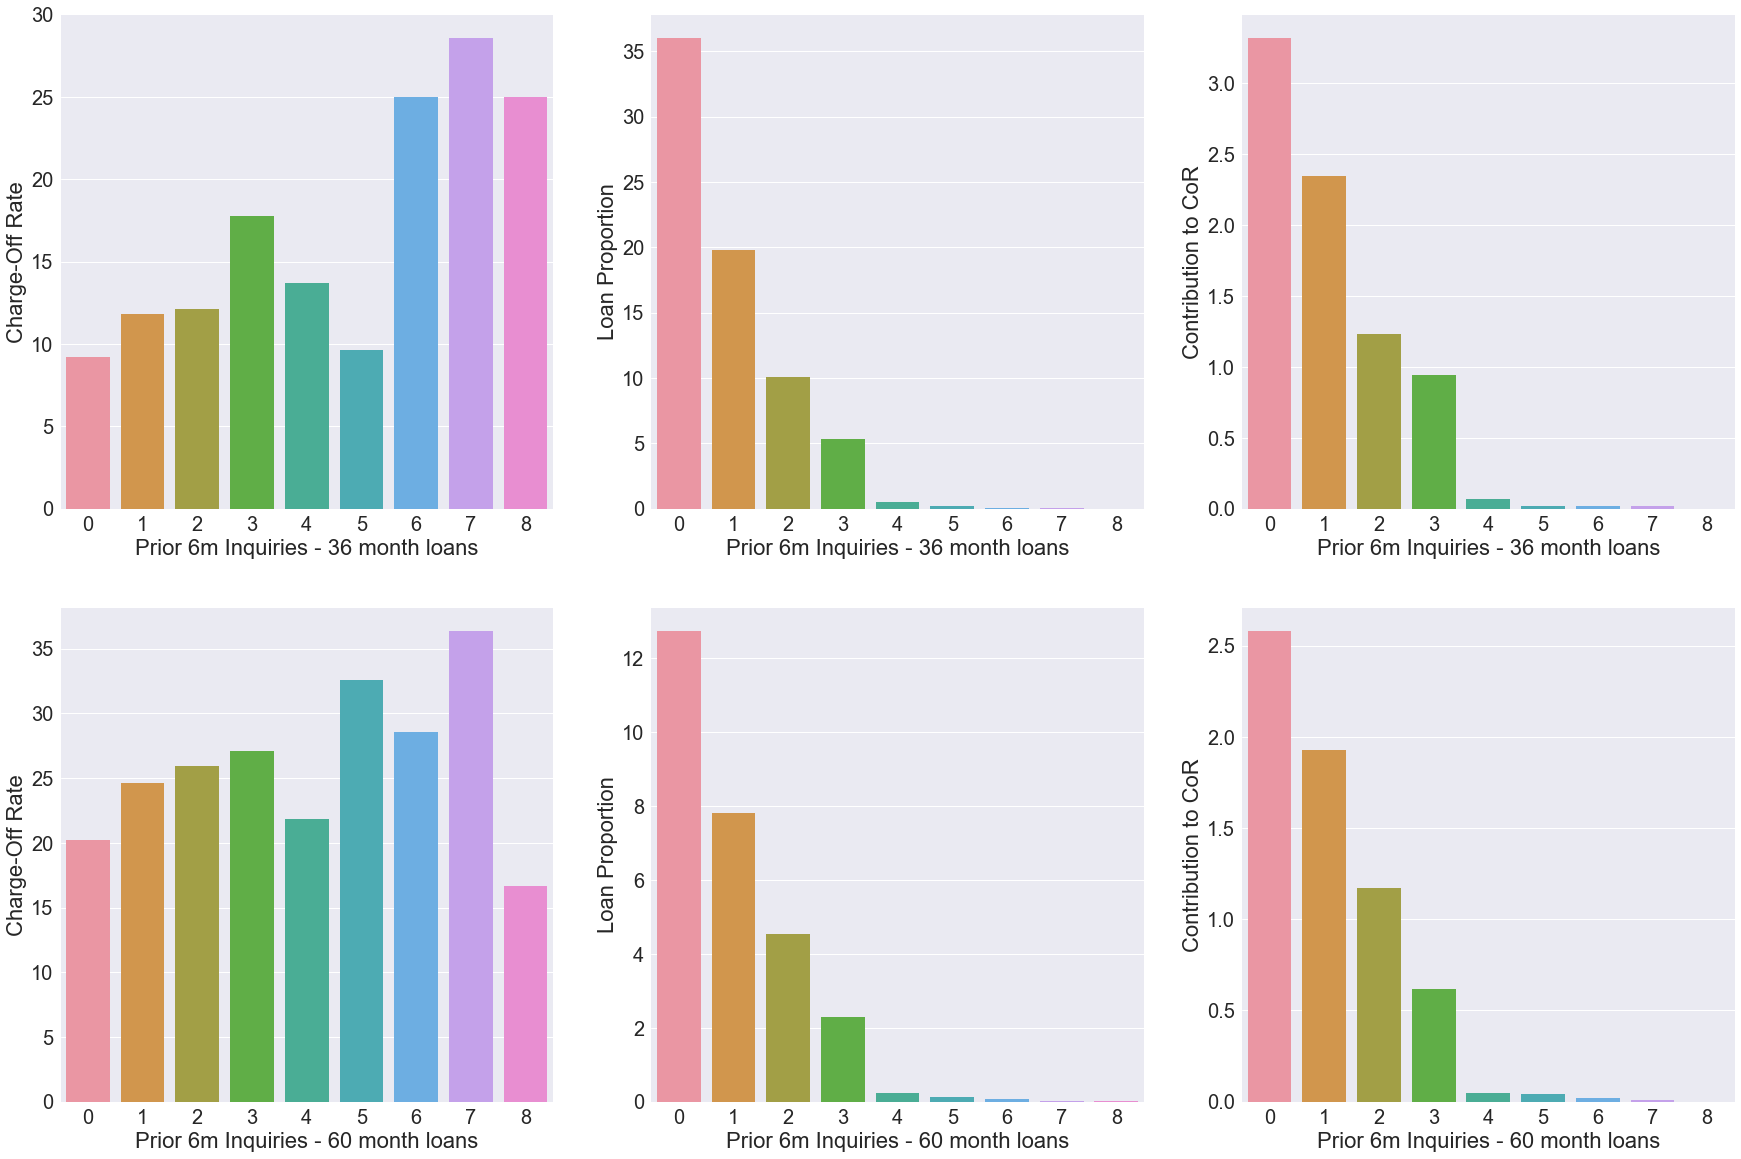

                          Charge-Off Rate  Num Loans  Loan Proportion  \
term      inq_last_6mths                                                
36 months 0                          9.21      12889            36.02   
          1                         11.84       7094            19.82   
          2                         12.13       3618            10.11   
          3                         17.76       1897             5.30   
          4                         13.68        190             0.53   
          5                          9.64         83             0.23   
          6                         25.00         32             0.09   
          7                         28.57         21             0.06   
          8                         25.00          4             0.01   
60 months 0                         20.24       4560            12.74   
          1                         24.65       2795             7.81   
          2                         25.91       162

In [35]:
# Analyse impact of Prior 6M Credit Inquiries ("inq_last_6mths") on charge_off
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","inq_last_6mths"]).inq_last_6mths.count() / 
             data.groupby(["term","inq_last_6mths"]).inq_last_6mths.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"inq_last_6mths":"Charge-Off Rate"}, inplace = True)
a["Num Loans"] = data.groupby(["term","inq_last_6mths"]).inq_last_6mths.count()
a["Loan Proportion"] = np.round(data.groupby(["term","inq_last_6mths"]).inq_last_6mths.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","inq_last_6mths"]).inq_last_6mths.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

plt.subplot(2, 3, 1)

g = sns.barplot(x=a.loc['36 months', :].index, y="Charge-Off Rate", data=a.loc['36 months', :])
g.set(xlabel="Prior 6m Inquiries - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(x=a.loc['36 months', :].index, y="Loan Proportion", data=a.loc['36 months', :])
g.set(xlabel="Prior 6m Inquiries - 36 month loans")

plt.subplot(2, 3, 3)

g = sns.barplot(x=a.loc['36 months', :].index, y="Contribution to CoR", data=a.loc['36 months', :])
g.set(xlabel="Prior 6m Inquiries - 36 month loans")

plt.subplot(2, 3, 4)

g = sns.barplot(x=a.loc['60 months', :].index, y="Charge-Off Rate", data=a.loc['60 months', :])
g.set(xlabel="Prior 6m Inquiries - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(x=a.loc['60 months', :].index, y="Loan Proportion", data=a.loc['60 months', :])
g.set(xlabel="Prior 6m Inquiries - 60 month loans")

plt.subplot(2, 3, 6)

g = sns.barplot(x=a.loc['60 months', :].index, y="Contribution to CoR", data=a.loc['60 months', :])
g.set(xlabel="Prior 6m Inquiries - 60 month loans")

plt.show()

print(a)

In [36]:
data["open_acc"].value_counts()

7     3702
6     3656
8     3604
9     3378
5     2980
10    2869
11    2420
4     2185
12    2005
13    1664
3     1396
14    1301
15    1015
16     794
17     625
2      542
18     457
19     328
20     236
21     213
22     121
23      81
24      63
25      51
26      26
27      18
28      18
30       9
29       8
34       5
31       4
33       3
32       3
35       2
36       2
38       1
39       1
44       1
Name: open_acc, dtype: int64

# Impact of Derogatory Public Records on Charge-Off Rates

### Insights:
1. High Charge-Off rates and reasonably strong contribution to Overall Charge-Off Rates from applicants with Derogatory Public Records

### Recommendation:
1. Implement rule to decline applications from those with one or more Derogatory Public Records

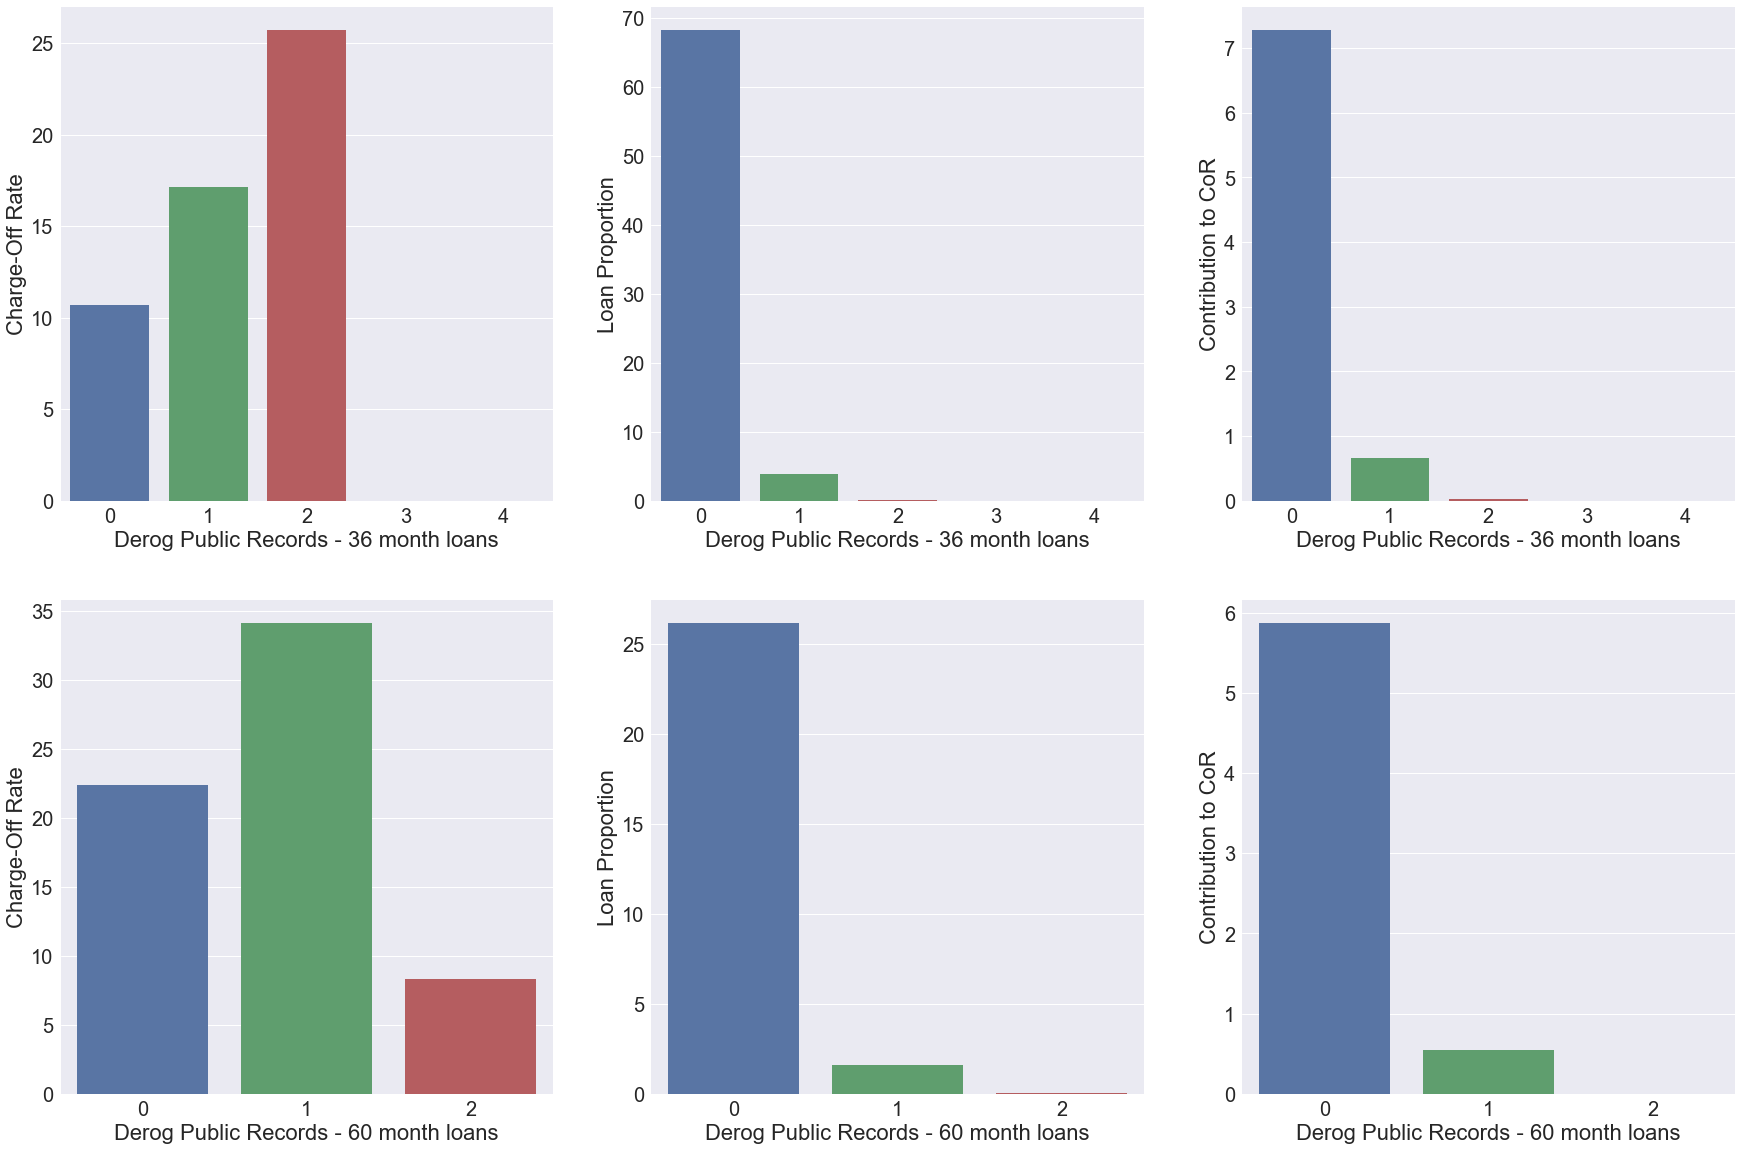

                   Charge-Off Rate  Num Loans  Loan Proportion  \
term      pub_rec                                                
36 months 0                  10.68      24404            68.19   
          1                  17.16       1381             3.86   
          2                  25.71         35             0.10   
          3                    NaN          6             0.02   
          4                    NaN          2             0.01   
60 months 0                  22.40       9370            26.18   
          1                  34.14        577             1.61   
          2                   8.33         12             0.03   

                   Contribution to CoR  
term      pub_rec                       
36 months 0                       7.28  
          1                       0.66  
          2                       0.03  
          3                        NaN  
          4                        NaN  
60 months 0                       5.87  
          1

In [37]:
# Analyse impact of Derogatory Public Records on charge_off
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","pub_rec"]).pub_rec.count() / 
             data.groupby(["term","pub_rec"]).pub_rec.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"pub_rec":"Charge-Off Rate"}, inplace = True)
a["Num Loans"] = data.groupby(["term","pub_rec"]).pub_rec.count()
a["Loan Proportion"] = np.round(data.groupby(["term","pub_rec"]).pub_rec.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","pub_rec"]).pub_rec.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

plt.subplot(2, 3, 1)

g = sns.barplot(x=a.loc['36 months', :].index, y="Charge-Off Rate", data=a.loc['36 months', :])
g.set(xlabel="Derog Public Records - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(x=a.loc['36 months', :].index, y="Loan Proportion", data=a.loc['36 months', :])
g.set(xlabel="Derog Public Records - 36 month loans")

plt.subplot(2, 3, 3)

g = sns.barplot(x=a.loc['36 months', :].index, y="Contribution to CoR", data=a.loc['36 months', :])
g.set(xlabel="Derog Public Records - 36 month loans")

plt.subplot(2, 3, 4)

g = sns.barplot(x=a.loc['60 months', :].index, y="Charge-Off Rate", data=a.loc['60 months', :])
g.set(xlabel="Derog Public Records - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(x=a.loc['60 months', :].index, y="Loan Proportion", data=a.loc['60 months', :])
g.set(xlabel="Derog Public Records - 60 month loans")

plt.subplot(2, 3, 6)

g = sns.barplot(x=a.loc['60 months', :].index, y="Contribution to CoR", data=a.loc['60 months', :])
g.set(xlabel="Derog Public Records - 60 month loans")

plt.show()

print(a)

# Impact of Public Bankruptcy Records on Charge-Off Rates

### Insights:
1. Applicants with no derogatory public records don't have any public bankruptcy records either (latter may well be a subset of former)
2. Since the earlier recommendation was to reject applications where there is any derogatory public record at all, this variable is not any further relevant to analysis / decision making

In [38]:
data.groupby("pub_rec").pub_rec_bankruptcies.value_counts()

pub_rec  pub_rec_bankruptcies
0        0.0                     33774
1        1.0                      1609
         0.0                       349
2        0.0                        41
         2.0                         6
3        0.0                         6
4        0.0                         2
Name: pub_rec_bankruptcies, dtype: int64

# Impact of Revolving Behaviour on Charge-Off Rates

### Insights:
1. Revolve Utilisation deciles rank-order charge off rates in both 36 month and 60 month loans
2. Deciles 9 in 36 mo loans and Deciles 7, 8 and 9 form a small proportion of total loans but have a disproportionately large impact on Overall Charge-Off Rates

### Recommendation:
1. Change approval policy by setting maximum Revolve Utilisation requirements - 76.3% for 36 mo loans and 62.1% for 60 mo loans

C:\Users\shasnagarajan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\shasnagarajan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


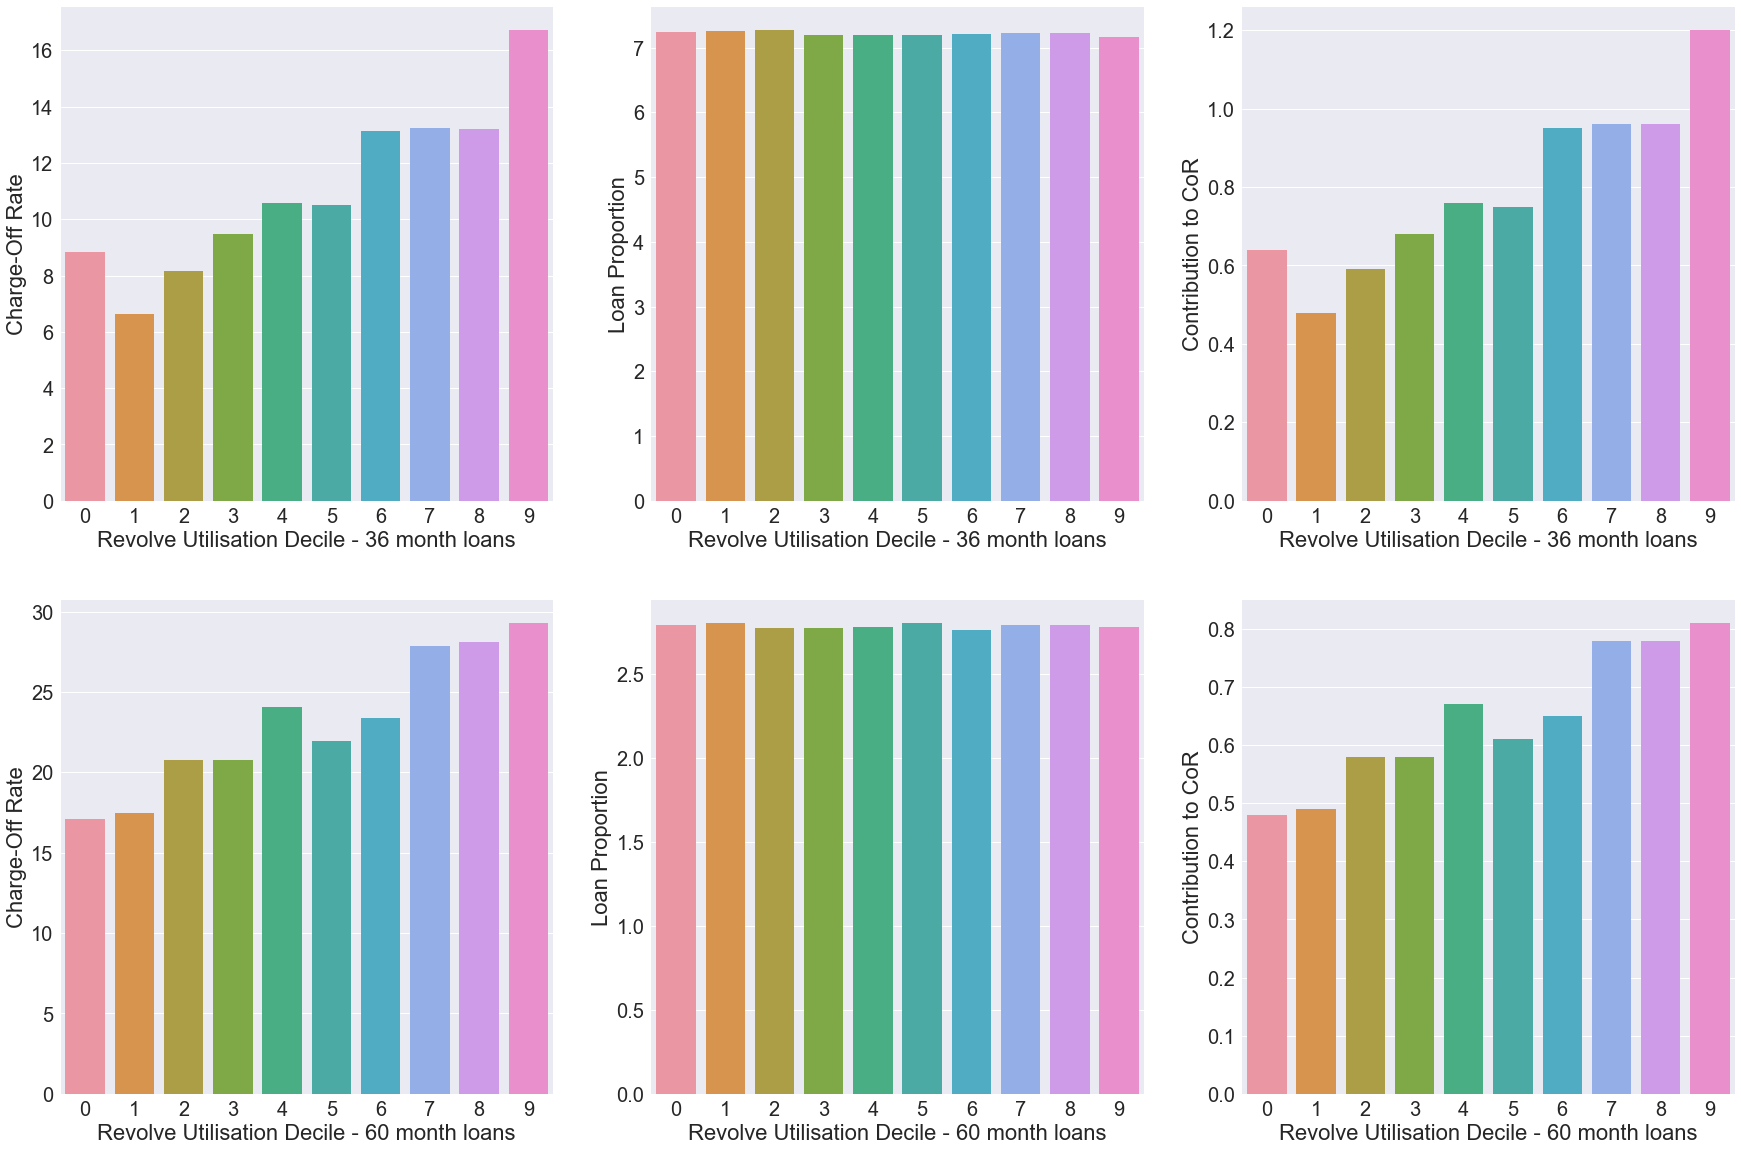

                        Charge-Off Rate  Num Loans  Loan Proportion  \
term      revol_decile                                                
36 months 0                        8.83       2592             7.24   
          1                        6.63       2594             7.25   
          2                        8.15       2600             7.27   
          3                        9.48       2575             7.20   
          4                       10.59       2577             7.20   
          5                       10.50       2572             7.19   
          6                       13.14       2579             7.21   
          7                       13.23       2585             7.22   
          8                       13.21       2588             7.23   
          9                       16.72       2566             7.17   
60 months 0                       17.10       1000             2.79   
          1                       17.47       1002             2.80   
      

In [39]:
# Analyse impact of Revolving Behaviour on charge_off
# Of the two variables 'revol_bal' and 'revol_util', revol_util normalises for total revolving credit available to different applicants; hence use revol_util for analysis

# However, since revol_util is a continuous variable, build deciles of it

data["revol_decile"] = 0 #initialise
data["revol_decile"][data["term"]=="36 months"] = pd.qcut(x=data["revol_util"][data["term"]=="36 months"], q=10, labels=np.arange(10))
data["revol_decile"][data["term"]=="60 months"] = pd.qcut(x=data["revol_util"][data["term"]=="60 months"], q=10, labels=np.arange(10))

# Proceed with analysis
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","revol_decile"]).revol_decile.count() / 
             data.groupby(["term","revol_decile"]).revol_decile.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"revol_decile":"Charge-Off Rate"}, inplace = True)
a["Num Loans"] = data.groupby(["term","revol_decile"]).revol_decile.count()
a["Loan Proportion"] = np.round(data.groupby(["term","revol_decile"]).revol_decile.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","revol_decile"]).revol_decile.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

plt.subplot(2, 3, 1)

g = sns.barplot(x=a.loc['36 months', :].index, y="Charge-Off Rate", data=a.loc['36 months', :])
g.set(xlabel="Revolve Utilisation Decile - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(x=a.loc['36 months', :].index, y="Loan Proportion", data=a.loc['36 months', :])
g.set(xlabel="Revolve Utilisation Decile - 36 month loans")

plt.subplot(2, 3, 3)

g = sns.barplot(x=a.loc['36 months', :].index, y="Contribution to CoR", data=a.loc['36 months', :])
g.set(xlabel="Revolve Utilisation Decile - 36 month loans")

plt.subplot(2, 3, 4)

g = sns.barplot(x=a.loc['60 months', :].index, y="Charge-Off Rate", data=a.loc['60 months', :])
g.set(xlabel="Revolve Utilisation Decile - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(x=a.loc['60 months', :].index, y="Loan Proportion", data=a.loc['60 months', :])
g.set(xlabel="Revolve Utilisation Decile - 60 month loans")

plt.subplot(2, 3, 6)

g = sns.barplot(x=a.loc['60 months', :].index, y="Contribution to CoR", data=a.loc['60 months', :])
g.set(xlabel="Revolve Utilisation Decile - 60 month loans")

plt.show()

print(a)

# Work out cut-offs for Max Revol Util based approval
print('Suggested Max Revol Util for 36 mo term: ' +
      str(np.round(np.percentile(data["revol_util"][data["term"]=="36 months"], q=80),1)) + '%')
print('Suggested Max Revol Util for 60 mo term: ' +
      str(np.round(np.percentile(data["revol_util"][data["term"]=="60 months"], q=60),1)) + '%')

# Impact of Total Number of Borrower's Credit Lines on Charge-Off Rates

### Insights:
1. The total number of credit lines a borrower had prior to application does not make a significant difference to Overall Charge-Off Rates

C:\Users\shasnagarajan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\shasnagarajan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


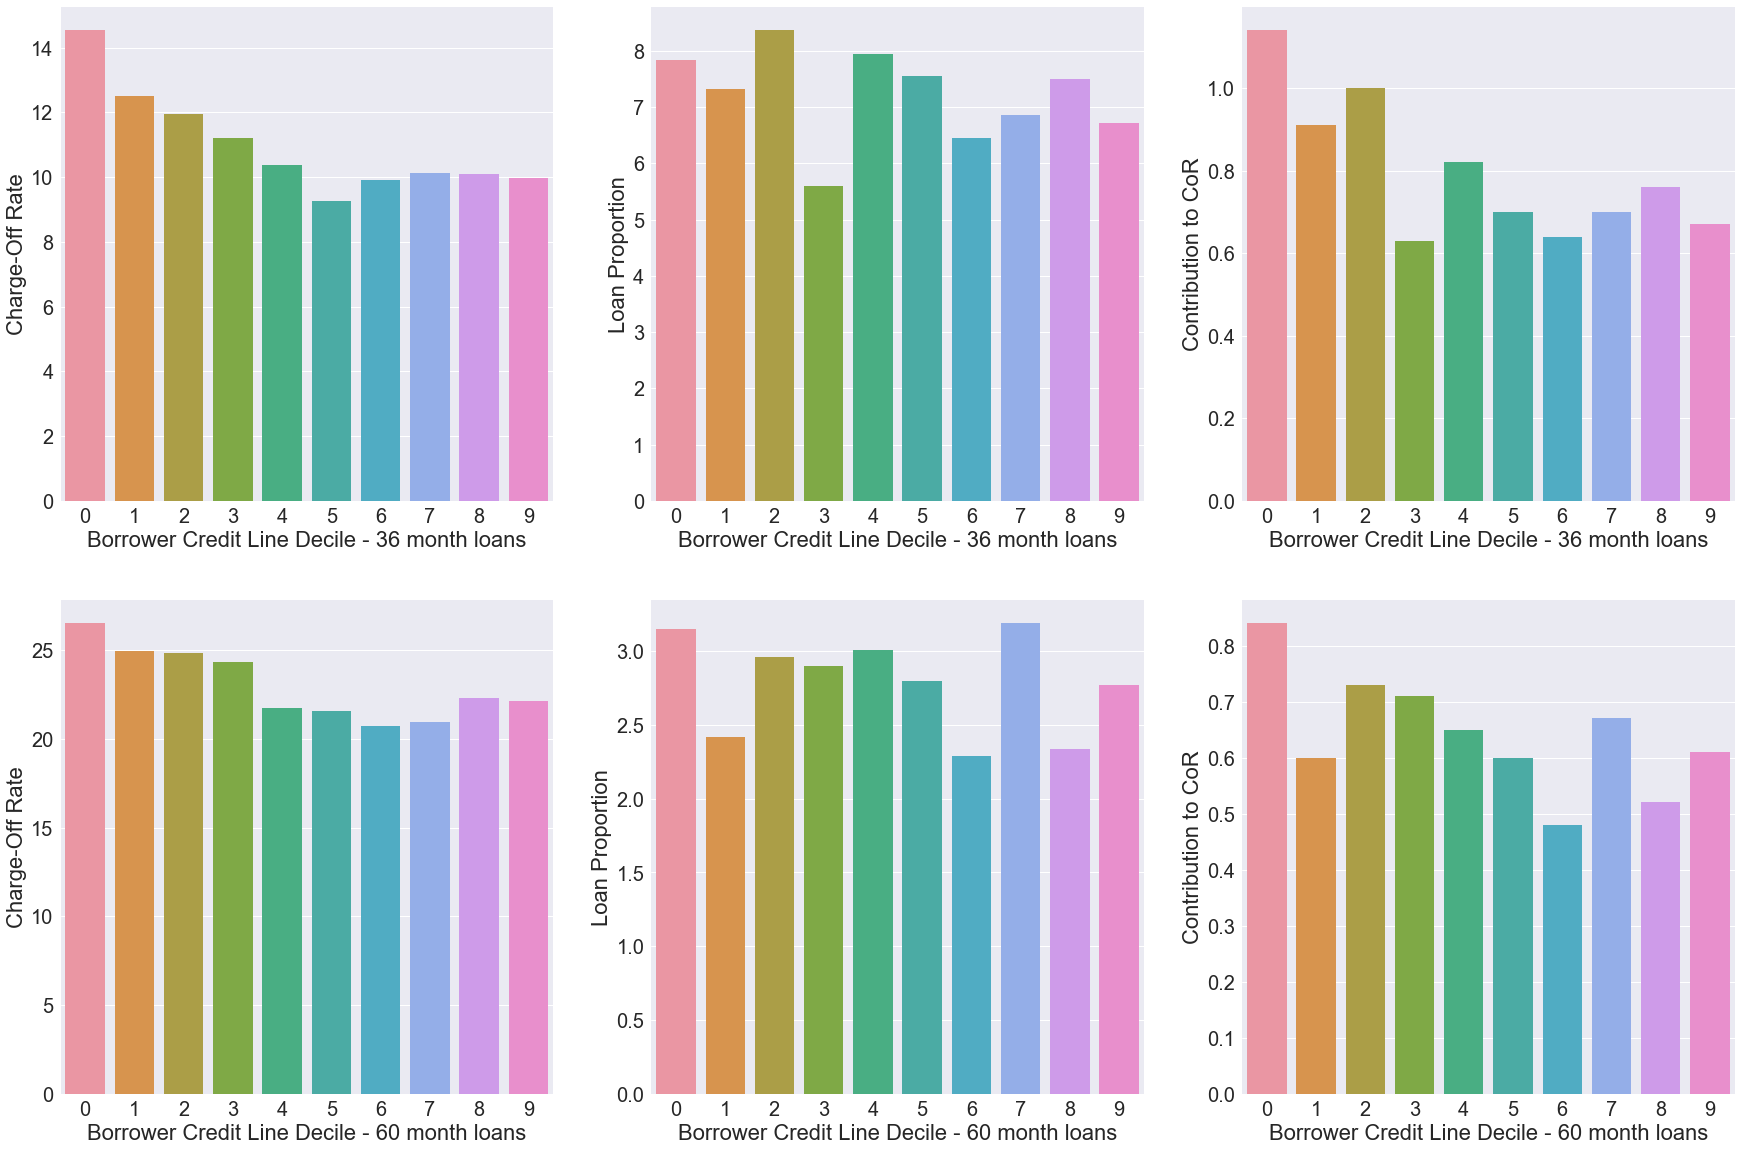

                            Charge-Off Rate  Num Loans  Loan Proportion  \
term      total_acc_decile                                                
36 months 0                           14.54       2806             7.84   
          1                           12.49       2618             7.32   
          2                           11.96       2994             8.37   
          3                           11.22       2005             5.60   
          4                           10.37       2845             7.95   
          5                            9.25       2702             7.55   
          6                            9.90       2313             6.46   
          7                           10.14       2456             6.86   
          8                           10.09       2685             7.50   
          9                            9.98       2404             6.72   
60 months 0                           26.53       1127             3.15   
          1              

In [40]:
# Analyse impact of Total Number of Borrower's Credit Lines (total_acc) on charge_off
# Since total_acc has a large number of unique values and is an ordered categorical variable, build deciles of it

data["total_acc_decile"] = 0 #initialise
data["total_acc_decile"][data["term"]=="36 months"] = pd.qcut(x=data["total_acc"][data["term"]=="36 months"], q=10, labels=np.arange(10))
data["total_acc_decile"][data["term"]=="60 months"] = pd.qcut(x=data["total_acc"][data["term"]=="60 months"], q=10, labels=np.arange(10))

# Proceed with analysis
a = np.round(data[data["charge_off_flag"] == 1].groupby(["term","total_acc_decile"]).total_acc_decile.count() / 
             data.groupby(["term","total_acc_decile"]).total_acc_decile.count()*100, 2)
a = pd.DataFrame(a)
a.rename(columns={"total_acc_decile":"Charge-Off Rate"}, inplace = True)
a["Num Loans"] = data.groupby(["term","total_acc_decile"]).total_acc_decile.count()
a["Loan Proportion"] = np.round(data.groupby(["term","total_acc_decile"]).total_acc_decile.count()/len(data)*100, 2)
a["Contribution to CoR"] = np.round(data[data["charge_off_flag"] == 1].groupby(["term","total_acc_decile"]).total_acc_decile.count()/len(data)*100, 2)

# Plot Results

sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=2)

plt.subplot(2, 3, 1)

g = sns.barplot(x=a.loc['36 months', :].index, y="Charge-Off Rate", data=a.loc['36 months', :])
g.set(xlabel="Borrower Credit Line Decile - 36 month loans")

plt.subplot(2, 3, 2)

g = sns.barplot(x=a.loc['36 months', :].index, y="Loan Proportion", data=a.loc['36 months', :])
g.set(xlabel="Borrower Credit Line Decile - 36 month loans")

plt.subplot(2, 3, 3)

g = sns.barplot(x=a.loc['36 months', :].index, y="Contribution to CoR", data=a.loc['36 months', :])
g.set(xlabel="Borrower Credit Line Decile - 36 month loans")

plt.subplot(2, 3, 4)

g = sns.barplot(x=a.loc['60 months', :].index, y="Charge-Off Rate", data=a.loc['60 months', :])
g.set(xlabel="Borrower Credit Line Decile - 60 month loans")

plt.subplot(2, 3, 5)

g = sns.barplot(x=a.loc['60 months', :].index, y="Loan Proportion", data=a.loc['60 months', :])
g.set(xlabel="Borrower Credit Line Decile - 60 month loans")

plt.subplot(2, 3, 6)

g = sns.barplot(x=a.loc['60 months', :].index, y="Contribution to CoR", data=a.loc['60 months', :])
g.set(xlabel="Borrower Credit Line Decile - 60 month loans")

plt.show()

print(a)

# Impact of Earliest Credit Line on Charge-Off Rates
- Data is bad (lots of rows have year > 2019) so analysis can't be conducted

In [41]:
data["earliest_cr_line"].value_counts()

1999-10-01    345
1998-11-01    336
1998-12-01    318
2000-10-01    318
2000-11-01    302
1999-11-01    299
1997-12-01    290
2000-09-01    275
1998-10-01    272
1997-11-01    271
1999-12-01    267
2000-01-01    263
2000-12-01    261
2000-07-01    255
2001-09-01    253
2002-10-01    251
2001-10-01    249
1995-12-01    248
2000-08-01    248
1996-12-01    242
1999-09-01    238
2000-05-01    238
2003-10-01    237
1999-08-01    236
1996-11-01    235
1998-08-01    235
2000-04-01    234
2001-01-01    229
2004-10-01    226
1998-09-01    225
             ... 
2066-06-01      1
2061-12-01      1
1971-08-01      1
1969-04-01      1
2065-02-01      1
2067-06-01      1
1971-02-01      1
2064-07-01      1
2065-12-01      1
1969-10-01      1
1974-10-01      1
2059-06-01      1
2067-02-01      1
2056-09-01      1
2065-09-01      1
2067-05-01      1
2062-11-01      1
2066-12-01      1
2061-11-01      1
1972-06-01      1
2063-03-01      1
2008-10-01      1
2046-01-01      1
2068-11-01      1
2065-11-01